# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Model evaluation criterion
### Model can make wrong predictions as:
1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

### Which case is more important?
Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.
* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.

### How to reduce the losses?
* F1 Score can be used a the metric for evaluation of the model, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.
* Balanced class weights will be use so that model focuses equally on both classes.

### F1 Definition 
The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.

## Historical Overview 

People choose to leave their native countries for many reasons. Lack of opportunities, political situation, and wanting a better life are all mentioned as reasons for wanting to immigrate.  

Looking over time the people with advanced knowledge and/or advanced degrees are usually the ones that immigrate first and have the easiest time immigrating and getting a job.  There have been many examples of this over the years.  

1. Operation Paperclip
    * Operation Paperclip was a secret United States intelligence program in which more than 1,600 Nazi German scientists, engineers, and technicians were taken from former Nazi Germany to the U.S. for government employment after the end of World War II in Europe, between 1945 and 1959.
2. East Germany in November 1989
    * After East Germany opened its boarders in November 1989, some of the first people to leave were skilled professionals. 
3. Russia today 
    * There are news reports stating as many as 100,000 IT professionals in Russia have left the country since the start of the war in Ukraine.  That is a rather large hit. 
    * The Biden administration is actively working on getting technical professionals to leave Russia and move to other countries.   

For the purposes of this assignment, we are going to operate under the assumption that history can and does repeat itself and the smartest and most capable are the ones most likely to immigrate.  

Sources: 
* https://www.nytimes.com/2022/04/13/technology/russia-tech-workers.html  
* https://sciencebusiness.net/news/us-plans-campaign-attract-russian-scientists-engineers-america  
* https://en.wikipedia.org/wiki/Operation_Paperclip#:~:text=Operation%20Paperclip%20was%20a%20secret,Europe%2C%20between%201945%20and%201959.

## Notes to reviewer
From time to time, you will find the %%time command included in some cells. It is there because I was interested in knowing the execution time of some cells, especially the cells than run complex commands. The command is not critical to the final outcome, but interesting to know.

I did both stacked and side-by-side barplots as I think the side-by-side plots are easier to read.

I also added a table with the percentages to the stacked and side-by-side barplots as I think the percentages are easier to understand and process rather than the raw numbers. 

For all the models, I followed this pattern: 
1. Check Base Model Performance on Training Set 
2. Check Base Model Performance on Test Set 
3. Perform Hyperparameter Tuning 
4. Check Tuned Model Performance on Training Set 
5. Check Tuned Model Performance on Test Set 
6. Model Performance Comparison and Conclusions 
7. Save DataFrame to Disk for future reload 

I am not the world's greatest speller so there will be spelling mistakes. Jupyter really needs a spell checker.


## Importing necessary libraries and data

In [48]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
from IPython.display import display_html

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
    StackingRegressor,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    make_scorer,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Function Definitions
I am old fashioned and was originally trained in procedural code. I like defining functions at the top of the notebook.
I also find it is better to have everything defined upfront so you can define and load everything all at once. The flow of the code is also not interrupted with a function defintion.

In [3]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default True)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=True, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=True, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [4]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [5]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [6]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [7]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [58]:
# Fuction to define a stacked barplot


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print("Totals")
    print(tab1)
    print("\n")

    tab2 = pd.crosstab(
        data[predictor], data[target], margins=True, normalize="index",
    ).sort_values(by=sorter, ascending=False)

    print("Percentages")
    print(tab2)

    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

    del tab1  # free memory
    del tab2
    del tab

<IPython.core.display.Javascript object>

In [59]:
# Fuction to define a stacked barplot


def side_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print("Totals")
    print(tab1)
    print("\n")

    tab2 = pd.crosstab(
        data[predictor], data[target], margins=True, normalize="index",
    ).sort_values(by=sorter, ascending=False)

    print("Percentages")
    print(tab2)

    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=False, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

    del tab1  # free memory
    del tab2
    del tab

<IPython.core.display.Javascript object>

In [10]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an emptY list to store train and test results
    score_list = []

    # Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # Accuracy of the model
    train_acc = model.score(X_train, Y_train)
    test_acc = model.score(X_test, Y_test)

    # Recall of the model
    train_recall = metrics.recall_score(Y_train, pred_train)
    test_recall = metrics.recall_score(Y_test, pred_test)

    # Precision of the model
    train_precision = metrics.precision_score(Y_train, pred_train)
    test_precision = metrics.precision_score(Y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, Y_train))
        print("Accuracy on test set : \t", model.score(X_test, Y_test))
        print("\nRecall on training set : ", metrics.recall_score(Y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(Y_test, pred_test))
        print(
            "\nPrecision on training set : ",
            metrics.precision_score(Y_train, pred_train),
        )
        print("Precision on test set : ", metrics.precision_score(Y_test, pred_test))

    return score_list  # returning the list with train and test scores

<IPython.core.display.Javascript object>

In [11]:
# function to get a value count and percentage for a column in a dataset


def count_percentage(data, contents):

    """
    To get a value count on a column and its percentage 

    data: dataframe
    contents: column to be counted
   
    """

    tempdf = pd.DataFrame(columns=[contents, "Percentage"])
    tempdf[contents] = data[contents].value_counts()
    tempdf["Percentage"] = data[contents].value_counts(normalize=True)

    print(contents, "with percentage of total \n")
    print(tempdf)

    del tempdf  # free memory

<IPython.core.display.Javascript object>

## Import Data

In [12]:
# read the data
df = pd.read_csv(
    "C:/Users/David/LibreOffice_Personal/DataScience/TestData_Files/EasyVisa.csv"
)
# Ran code on local machine using Anaconda

# returns the first 5 rows
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

In [13]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [14]:
print("There are", df.shape[0], "rows and", df.shape[1], "columns.")

There are 25480 rows and 12 columns.


<IPython.core.display.Javascript object>

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

### Notes

Dropping case_ID column as it does not provide any value. This is similar to what was done in the last project where we dropped the Booking_ID column


In [16]:
df.drop(["case_id"], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

In [17]:
# Changing the columns 'brand_name' and 'os' into the category data type because that is what they are

df["continent"] = df.continent.astype("category")
df["education_of_employee"] = df.education_of_employee.astype("category")
df["region_of_employment"] = df.region_of_employment.astype("category")
df["unit_of_wage"] = df.unit_of_wage.astype("category")
df["case_status"] = df.case_status.astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  object  
 3   requires_job_training  25480 non-null  object  
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  object  
 10  case_status            25480 non-null  category
dtypes: category(5), float64(1), int64(2), object(3)
memory usage: 1.3+ MB


<IPython.core.display.Javascript object>

In [18]:
df.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

In [19]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

### Notes  

No nulls or Nan in the data.  No duplicates either.  A full dataset. 

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


<IPython.core.display.Javascript object>

### Notes 
* The yr_of_estab is a year so most of the statistics do not apply 
    * The min and max are interesting as that gives a range of years 
    * The years will be skewed as half of the companies were founded between 1997 and 2016 
* The no_of_employees has a rather wide range and will be skewed 
    * A minimum of -26 employees?  Something is wierd with that 
    * A max of 602,069 is believable for a Fortune 500 global company 
* The prevailing_wage also has a rather wide range and will be skewed  
    * A minimum wage of 2.1367?  That has to be an hourly rate 
    * A maximum salary of 319,210 is believable assuming it is for a high executive 

In [22]:
cat_col = list(df.select_dtypes("object").columns)

<IPython.core.display.Javascript object>

In [23]:
i = 0

for column in cat_col:
    print("Value counts for ", cat_col[i], ":", sep="")
    print(df[column].value_counts())
    print("-" * 50)
    print("\n")
    i += 1

Value counts for has_job_experience:
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------


Value counts for requires_job_training:
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------


Value counts for full_time_position:
Y    22773
N     2707
Name: full_time_position, dtype: int64
--------------------------------------------------




<IPython.core.display.Javascript object>

### Observations
1. The most applicants come from Asia 
2. Most applicants have either a Bachelor's or Master's degree
3. More applicants have job experience, but the numbers are close to each other 
4. The majority of applicants have job experience 
    * This is not a surprise 
5. The majority of applicants do not need job training
    * This is not a surprise 
6. The majority of the applicants live in the Northest, South, and West regions
7. Most applicants are paid a yearly wage 
8. Most applicants do get their Visa approved 

In [24]:
i = 0

for column in cat_col:
    print("There are", df[column].nunique(), "unique", cat_col[i])
    print("-" * 50)
    print("\n")
    i += 1

There are 2 unique has_job_experience
--------------------------------------------------


There are 2 unique requires_job_training
--------------------------------------------------


There are 2 unique full_time_position
--------------------------------------------------




<IPython.core.display.Javascript object>

In [25]:
print(
    "There are",
    df["yr_of_estab"].nunique(),
    "unique years of companies being established",
)
print("The oldest company was established in", df["yr_of_estab"].min())
print("The newest company was established in", df["yr_of_estab"].max())

There are 199 unique years of companies being established
The oldest company was established in 1800
The newest company was established in 2016


<IPython.core.display.Javascript object>

### Observations
* Companies have been established over 199 years
* There is going to be a large spead or variance for this data 
* The data will be skewed 

In [26]:
print(
    "There are", df["prevailing_wage"].nunique(), "unique prevailing wages",
)
print("The lowest prevailing wage is", df["prevailing_wage"].min())
print("The highest prevailing wage is", df["prevailing_wage"].max())

tempdf = df[df["unit_of_wage"] == "Hour"]
print(
    "\nThere are",
    tempdf["prevailing_wage"].nunique(),
    "unique prevailing hourly wages",
)
print("The lowest prevailing hourly wage is", tempdf["prevailing_wage"].min())
print("The highest prevailing hourly wage is", tempdf["prevailing_wage"].max())

tempdf = df[df["unit_of_wage"] == "Week"]
print(
    "\nThere are",
    tempdf["prevailing_wage"].nunique(),
    "unique prevailing weekly wages",
)
print("The lowest prevailing weekly wage is", tempdf["prevailing_wage"].min())
print("The highest prevailing weekly wage is", tempdf["prevailing_wage"].max())

tempdf = df[df["unit_of_wage"] == "Month"]
print(
    "\nThere are",
    tempdf["prevailing_wage"].nunique(),
    "unique prevailing monthly wages",
)
print("The lowest prevailing monthly wage is", tempdf["prevailing_wage"].min())
print("The highest prevailing monthly wage is", tempdf["prevailing_wage"].max())

tempdf = df[df["unit_of_wage"] == "Year"]
print(
    "\nThere are",
    tempdf["prevailing_wage"].nunique(),
    "unique prevailing yearly wages",
)
print("The lowest prevailing yearly wage is", tempdf["prevailing_wage"].min())
print("The highest prevailing yearly wage is", tempdf["prevailing_wage"].max())

del tempdf  # free the memory

There are 25454 unique prevailing wages
The lowest prevailing wage is 2.1367
The highest prevailing wage is 319210.27

There are 2145 unique prevailing hourly wages
The lowest prevailing hourly wage is 2.1367
The highest prevailing hourly wage is 999.9195

There are 272 unique prevailing weekly wages
The lowest prevailing weekly wage is 2183.23
The highest prevailing weekly wage is 280175.95

There are 89 unique prevailing monthly wages
The lowest prevailing monthly wage is 1599.28
The highest prevailing monthly wage is 264362.95

There are 22950 unique prevailing yearly wages
The lowest prevailing yearly wage is 100.0
The highest prevailing yearly wage is 319210.27


<IPython.core.display.Javascript object>

### Observations
* Since there are four wage types, it make sense to analyze each type separately 
* Yearly wage type is the most popular 
* Monthly wage type has the fewest
* All the wage types have a large spread or variance

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

## Univariate Analysis

### Analysis of Continent Information

continent with percentage of total 

               continent  Percentage
Asia               16861    0.661735
Europe              3732    0.146468
North America       3292    0.129199
South America        852    0.033438
Africa               551    0.021625
Oceania              192    0.007535
--------------------------------------------------




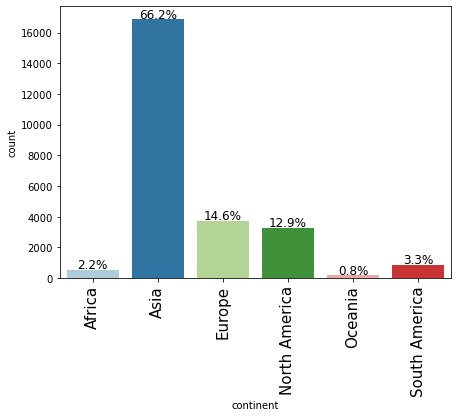

<IPython.core.display.Javascript object>

In [27]:
count_percentage(df, "continent")
print("-" * 50)
print("\n")
labeled_barplot(df, "continent")

### Observations  

* It is easy to see that Asia leads the continents in the most applicants 
* Asia, Eurpoe, and North America consitiute 93.7% of the applicants 

### Analysis of Education of Employee

education_of_employee with percentage of total 

             education_of_employee  Percentage
Bachelor's                   10234    0.401648
Master's                      9634    0.378100
High School                   3420    0.134223
Doctorate                     2192    0.086028
--------------------------------------------------




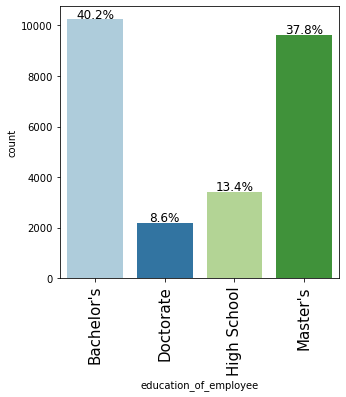

<IPython.core.display.Javascript object>

In [28]:
count_percentage(df, "education_of_employee")
print("-" * 50)
print("\n")
labeled_barplot(df, "education_of_employee")

### Observations  
* Bachelor's and Master's degrees are the dominant degrees for the applicants 
* When combining all University level degrees, 86.6% of the applicants have some form of a higher education degree 
    * This follows the idea that well educated people are in demand and will immigrate 

### Analysis of Has Job Experience 

has_job_experience with percentage of total 

   has_job_experience  Percentage
Y               14802    0.580926
N               10678    0.419074
--------------------------------------------------




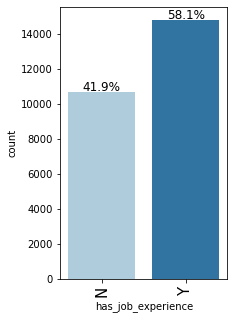

<IPython.core.display.Javascript object>

In [29]:
count_percentage(df, "has_job_experience")
print("-" * 50)
print("\n")
labeled_barplot(df, "has_job_experience")

### Observations 
* It is a roughly 60/40 split on if the applicant has job experience 
* Given the education level, it would be safe to assume some of the applicants are recent graduates willing to move to another country to start their careers. 
* The other applicants have experience in job's field, but are willing to immigrate 

### Analysis of Requires Job Training 

requires_job_training with percentage of total 

   requires_job_training  Percentage
N                  22525    0.884027
Y                   2955    0.115973
--------------------------------------------------




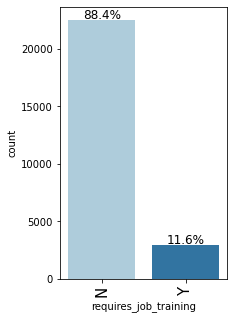

<IPython.core.display.Javascript object>

In [30]:
count_percentage(df, "requires_job_training")
print("-" * 50)
print("\n")
labeled_barplot(df, "requires_job_training")

### Observations 
* By "Job Training", we assume the applicant already has knowledge in the field of the job, but will need education on how the actual job works 
* The vast majority of the applicants do not require job training 
* Given the level of education and work experience, some of the applicants are new graduates with lots of knowledge, but not much experience

### Analysis of Number of Employees 

no_of_employees with percentage of total 

       no_of_employees  Percentage
183                 18    0.000706
854                 16    0.000628
724                 16    0.000628
766                 15    0.000589
1476                15    0.000589
...                ...         ...
5876                 1    0.000039
5536                 1    0.000039
47866                1    0.000039
4700                 1    0.000039
40224                1    0.000039

[7105 rows x 2 columns]
--------------------------------------------------




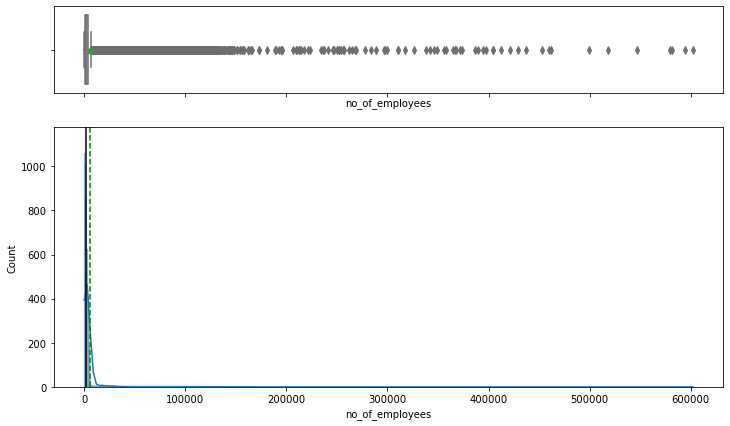

<IPython.core.display.Javascript object>

In [31]:
count_percentage(df, "no_of_employees")
print("-" * 50)
print("\n")
histogram_boxplot(df, "no_of_employees")

In [32]:
tempdf = pd.DataFrame(columns=["no_of_employees", "Percentage"])
tempdf["no_of_employees"] = df["no_of_employees"].value_counts()
tempdf["Percentage"] = df["no_of_employees"].value_counts(normalize=True)
tempdf.reset_index(drop=True, inplace=True)

print("\n\nFirst 20 entries number of employees:")
print(tempdf.head(20))

del tempdf



First 20 entries number of employees:
    no_of_employees  Percentage
0                18    0.000706
1                16    0.000628
2                16    0.000628
3                15    0.000589
4                15    0.000589
5                14    0.000549
6                14    0.000549
7                14    0.000549
8                14    0.000549
9                14    0.000549
10               13    0.000510
11               13    0.000510
12               13    0.000510
13               13    0.000510
14               13    0.000510
15               13    0.000510
16               13    0.000510
17               13    0.000510
18               13    0.000510
19               13    0.000510


<IPython.core.display.Javascript object>

### Observations  
* From the Data Overview section we know the following about the number of employees: 
    * Mean: 5667
    * Median: 2109 
    * Minimun: -26  (Need to wonder about this) 
    * Maximum: 602,069 
* The data is heavily skewed right 
* In terms of number of employees, the numbers are all over the place with a very large range 
    * Probably would be best to group the number of employees into T-Shirt sizes: Small, Medium, Large, Extra Large

### Analysis of Year of Establishment

yr_of_estab with percentage of total 

      yr_of_estab  Percentage
1998         1134    0.044505
2005         1051    0.041248
2001         1017    0.039914
2007          994    0.039011
1999          870    0.034144
...           ...         ...
1842            6    0.000235
1846            4    0.000157
1822            4    0.000157
1810            3    0.000118
1824            2    0.000078

[199 rows x 2 columns]
--------------------------------------------------




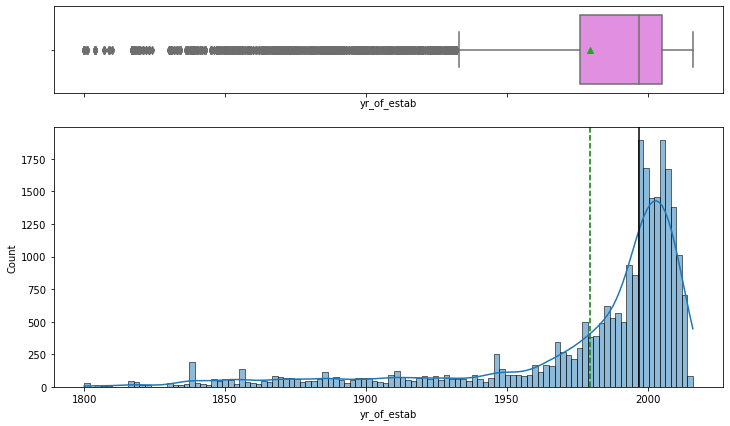

<IPython.core.display.Javascript object>

In [33]:
count_percentage(df, "yr_of_estab")
print("-" * 50)
print("\n")
histogram_boxplot(df, "yr_of_estab")

### Observations  

* Like number of employees, there is a great range to the year the business was started 
* From the Data Overview section, we know the following about the year of establishment: 
    * Mean: 1979
    * Median: 1997
    * Minimum: 1800
    * Maximum: 2016
* 50% of the companies where founded during the period: 1997 - 2016 
* Data is definately left skewed 
* Working with companies that are relativily new 
    * This is assuming a 25 old company is "new" 
        * However, a 25 year old company would be new to a company started before 1900 


### Analysis of Region of Employment

region_of_employment with percentage of total 

           region_of_employment  Percentage
Northeast                  7195    0.282378
South                      7017    0.275392
West                       6586    0.258477
Midwest                    4307    0.169035
Island                      375    0.014717
--------------------------------------------------




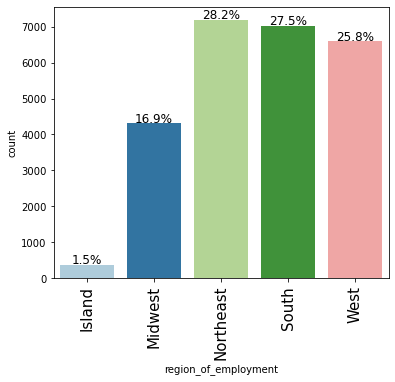

<IPython.core.display.Javascript object>

In [34]:
count_percentage(df, "region_of_employment")
print("-" * 50)
print("\n")
labeled_barplot(df, "region_of_employment")

### Observations  

* The majority of businesses are located in the Northeast, South, and West 
    * Given the number of companies located in these areas, this is not a surprise 
* Assuming "Island" means Hawaii, a number of 1.5% makes sense 
* It would be interesting to see if the number for the Midwest could be improved 

### Analysis of Prevailing Wage 

prevailing_wage with percentage of total 

             prevailing_wage  Percentage
82560.2800                 2    0.000078
122.6500                   2    0.000078
60948.1500                 2    0.000078
64357.5800                 2    0.000078
108.1200                   2    0.000078
...                      ...         ...
25713.9800                 1    0.000039
101656.6400                1    0.000039
65665.5500                 1    0.000039
50.8813                    1    0.000039
70876.9100                 1    0.000039

[25454 rows x 2 columns]
--------------------------------------------------




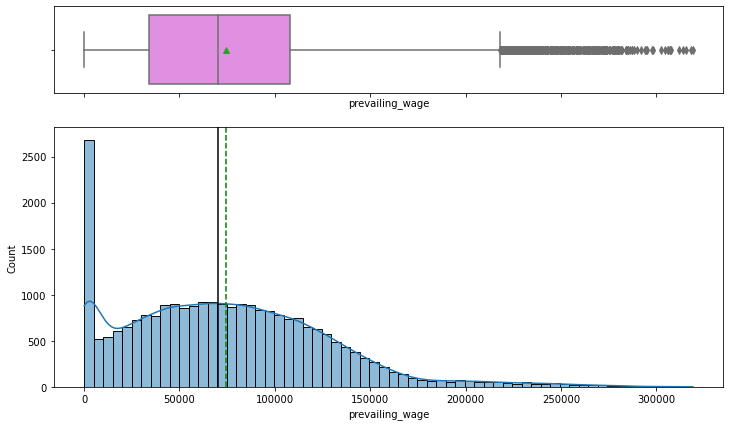

<IPython.core.display.Javascript object>

In [35]:
count_percentage(df, "prevailing_wage")
print("-" * 50)
print("\n")
histogram_boxplot(df, "prevailing_wage")

### Observations 
* Given that there are four wage types and such a big spread in the values, we are going to analyze each wage type separately

### Analysis of Hour Wage Type

The lowest prevailing hourlyly wage is 2.1367
The highest prevailing hourly wage is 999.9195
The mean prevailing hourly wage is 414.57
The median prevailing hourly wage is 372.6523


Prevailing wage for hourly wage type

prevailing_wage with percentage of total 

          prevailing_wage  Percentage
138.7600                2    0.000927
134.1500                2    0.000927
105.9600                2    0.000927
108.1200                2    0.000927
118.4300                2    0.000927
...                   ...         ...
44.8222                 1    0.000464
124.7300                1    0.000464
786.1880                1    0.000464
318.4801                1    0.000464
516.4101                1    0.000464

[2145 rows x 2 columns]
--------------------------------------------------




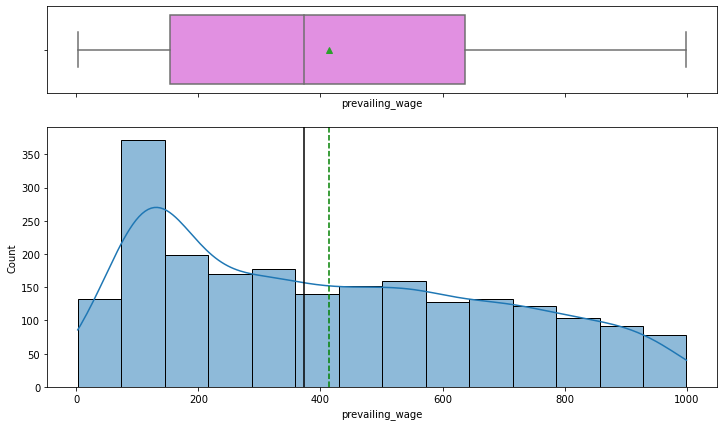

<IPython.core.display.Javascript object>

In [36]:
tempdf = df[df["unit_of_wage"] == "Hour"]

print("The lowest prevailing hourlyly wage is", tempdf["prevailing_wage"].min())
print("The highest prevailing hourly wage is", tempdf["prevailing_wage"].max())
print("The mean prevailing hourly wage is", round(tempdf["prevailing_wage"].mean(), 2))
print("The median prevailing hourly wage is", tempdf["prevailing_wage"].median())
print("\n")

print("Prevailing wage for hourly wage type\n")
count_percentage(tempdf, "prevailing_wage")
print("-" * 50)
print("\n")
histogram_boxplot(tempdf, "prevailing_wage")

del tempdf

### Observations 

* There is a large variance of wages going from 2.14 to 999.92
* No outliers in the data for hourly wage 
* The mean and median values are somewhat close
* The median was probably pulled lower by the wages approximately between 66 - 132 
    * Second bar on the left and estimating the bars to roughly include 66 wages 
* The second majority of wages are of the hourly type 

### Analysis of Week Wage Type

The lowest prevailing weekly wage is 2183.23
The highest prevailing weekly wage is 280175.95
The mean prevailing weekly wage is 85606.82
The median prevailing weekly wage is 85075.82


Prevailing wage for weekly wage type

prevailing_wage with percentage of total 

           prevailing_wage  Percentage
98966.72                 1    0.003676
108734.42                1    0.003676
84729.79                 1    0.003676
94005.34                 1    0.003676
93972.30                 1    0.003676
...                    ...         ...
95478.53                 1    0.003676
34091.08                 1    0.003676
29465.04                 1    0.003676
144234.86                1    0.003676
154057.64                1    0.003676

[272 rows x 2 columns]
--------------------------------------------------




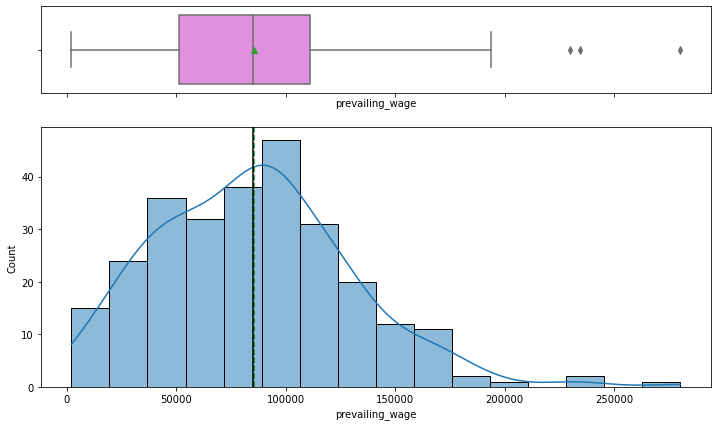

<IPython.core.display.Javascript object>

In [37]:
tempdf = df[df["unit_of_wage"] == "Week"]

print("The lowest prevailing weekly wage is", tempdf["prevailing_wage"].min())
print("The highest prevailing weekly wage is", tempdf["prevailing_wage"].max())
print("The mean prevailing weekly wage is", round(tempdf["prevailing_wage"].mean(), 2))
print("The median prevailing weekly wage is", tempdf["prevailing_wage"].median())
print("\n")

print("Prevailing wage for weekly wage type\n")
count_percentage(tempdf, "prevailing_wage")
print("-" * 50)
print("\n")
histogram_boxplot(tempdf, "prevailing_wage")

del tempdf

### Observations 

* The mean and median are basically the same 
* There is a long right tail, but basically there is a uniform distribution 
* There is a big variance in the weekly wages, but the wages are more uniformly distributed than the other wage types 

### Analysis of Month Wage Type

The lowest prevailing monthly wage is 1599.28
The highest prevailing monthly wage is 264362.95
The mean prevailing monthly wage is 87592.86
The median prevailing monthly wage is 81826.01


Prevailing wage for monthly wage type

prevailing_wage with percentage of total 

           prevailing_wage  Percentage
141796.39                1    0.011236
3078.37                  1    0.011236
21104.66                 1    0.011236
144778.25                1    0.011236
60248.65                 1    0.011236
23656.43                 1    0.011236
72476.76                 1    0.011236
246099.93                1    0.011236
157009.87                1    0.011236
44659.23                 1    0.011236
19425.40                 1    0.011236
11722.23                 1    0.011236
65697.01                 1    0.011236
22950.92                 1    0.011236
53314.50                 1    0.011236
212271.15                1    0.011236
26560.26                 1    0.011236
123845.84                1 

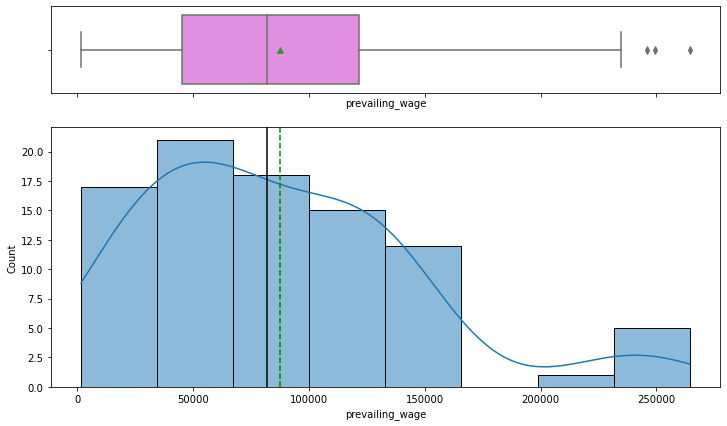

<IPython.core.display.Javascript object>

In [38]:
tempdf = df[df["unit_of_wage"] == "Month"]

print("The lowest prevailing monthly wage is", tempdf["prevailing_wage"].min())
print("The highest prevailing monthly wage is", tempdf["prevailing_wage"].max())
print("The mean prevailing monthly wage is", round(tempdf["prevailing_wage"].mean(), 2))
print("The median prevailing monthly wage is", tempdf["prevailing_wage"].median())
print("\n")

print("Prevailing wage for monthly wage type\n")
count_percentage(tempdf, "prevailing_wage")
print("-" * 50)
print("\n")
histogram_boxplot(tempdf, "prevailing_wage")

del tempdf

### Observations  

* Like with the other wage types, there is a large variance between the minimum and maximum monthly wages 
* Montly wage has the fewest number of wages in the set 
* The highest three monthly wages are outliers 
* The rest of the monthly wages are close to being uniformly distributed 
* The mean and median are also close, but as not as close as for the weekly wage type 

### Analysis of Year Wage Type

The lowest prevailing yearly wage is 100.0
The highest prevailing yearly wage is 319210.27
The mean prevailing yearly wage is 81228.08
The median prevailing yearly wage is 76174.5


Prevailing wage for yearly wage type

prevailing_wage with percentage of total 

           prevailing_wage  Percentage
6036.67                  2    0.000087
93356.03                 2    0.000087
82560.28                 2    0.000087
74645.92                 2    0.000087
60948.15                 2    0.000087
...                    ...         ...
46100.72                 1    0.000044
104941.46                1    0.000044
188121.77                1    0.000044
108544.37                1    0.000044
70876.91                 1    0.000044

[22950 rows x 2 columns]
--------------------------------------------------




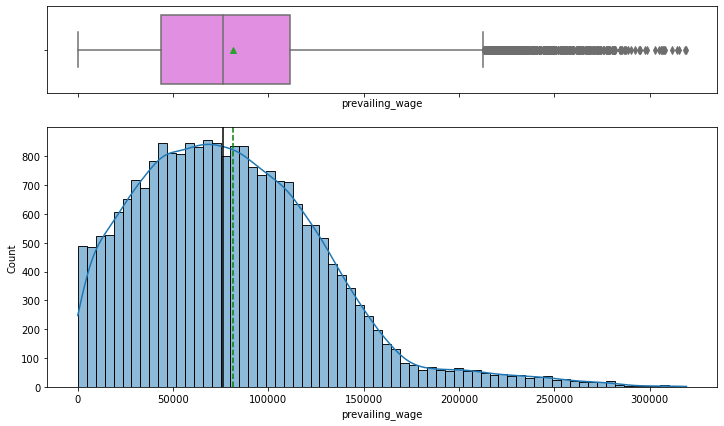

<IPython.core.display.Javascript object>

In [39]:
tempdf = df[df["unit_of_wage"] == "Year"]

print("The lowest prevailing yearly wage is", tempdf["prevailing_wage"].min())
print("The highest prevailing yearly wage is", tempdf["prevailing_wage"].max())
print("The mean prevailing yearly wage is", round(tempdf["prevailing_wage"].mean(), 2))
print("The median prevailing yearly wage is", tempdf["prevailing_wage"].median())
print("\n")

print("Prevailing wage for yearly wage type\n")
count_percentage(tempdf, "prevailing_wage")
print("-" * 50)
print("\n")
histogram_boxplot(tempdf, "prevailing_wage")

del tempdf

### Observations  
* Like with the other wage types, there is a large variance between the lowest and highest yearly wage 
* The mean and median are close to each other and probably second to the weekly wage amounts 
* There are many outliers giving the histogram a long right tail 
* Subtracting or ignoring the right tail, the yearly wages are close to being normally distributed 
* Assuming the wages over 200,000 are for executives and other high ranking managers 

### Analysis of Unit of Wage 

unit_of_wage with percentage of total 

       unit_of_wage  Percentage
Year          22962    0.901177
Hour           2157    0.084655
Week            272    0.010675
Month            89    0.003493
--------------------------------------------------




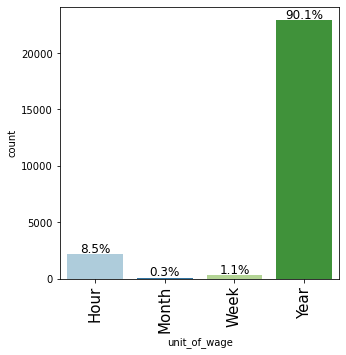

<IPython.core.display.Javascript object>

In [101]:
count_percentage(df, "unit_of_wage")
print("-" * 50)
print("\n")
labeled_barplot(df, "unit_of_wage")

### Observations  
* The vast majority of the jobs have a unit of wage of a year 
* Second highest unit of wage is hourly 
* Given this, it can be assumed most of the applicants are not labour or contractors 
* Given level of education, it can be assumed the applicants are "white collar workers" employed in some type of office/remote environment 

### Analysis of Full Time Position 

full_time_position with percentage of total 

   full_time_position  Percentage
Y               22773     0.89376
N                2707     0.10624
--------------------------------------------------




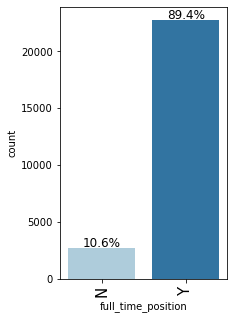

<IPython.core.display.Javascript object>

In [102]:
count_percentage(df, "full_time_position")
print("-" * 50)
print("\n")
labeled_barplot(df, "full_time_position")

### Observations   
* The vast majorioty of position are full time positions which is not surprising since the applicant is changing countries 
* It would be a big bet to change countries for a part time position 
* Given this and full time positions and level of education and yearly salary, it can be assumed the applicants are "white collar workers" employed in some type of office/remote environment 

### Analysis of Case Status 

case_status with percentage of total 

           case_status  Percentage
Certified        17018    0.667896
Denied            8462    0.332104
--------------------------------------------------




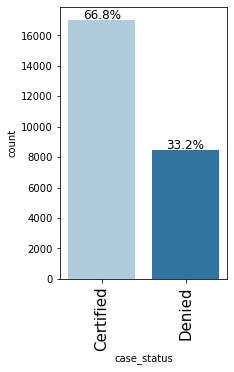

<IPython.core.display.Javascript object>

In [103]:
count_percentage(df, "case_status")
print("-" * 50)
print("\n")
labeled_barplot(df, "case_status")

### Observations  
* There is a roughly two-thirds split between "Certified" and "Denied"  
* This data needs to be combined with the other data points like level of education to determine why there is a two-thirds split 
* Otherwise, there is not much that can be done with this data point 

## Bivariate Analysis

### Analysis of Correlation

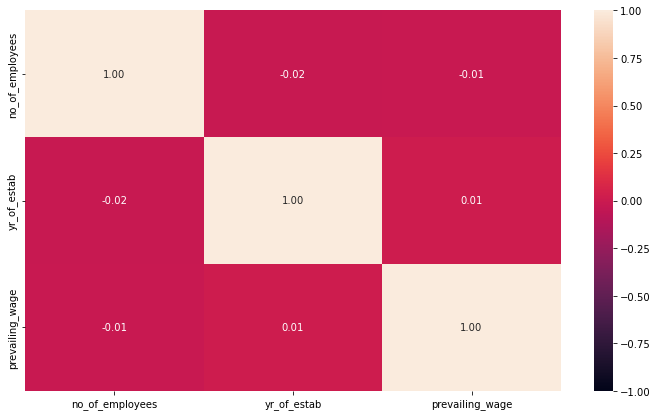

Wall time: 378 ms


<IPython.core.display.Javascript object>

In [104]:
%%time

cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

### Observations 
* There is no correlation between the numbers as they are all independent of each other 
    * Year of establishment does not relate to anything 
* There could be a correlation between number of employees and prevailing wage as larger companies might be able to pay better 
    * However, this is always the case -- see all the start ups in Silicon Valley 
* It would be interesting to see the correlation between number of employees and prevailing wage and geographic location 

### Analysis of Education and Visa Certification

Totals
case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192


Percentages
case_status            Certified    Denied
education_of_employee                     
High School             0.340351  0.659649
Bachelor's              0.622142  0.377858
All                     0.667896  0.332104
Master's                0.786278  0.213722
Doctorate               0.872263  0.127737
------------------------------------------------------------------------------------------------------------------------


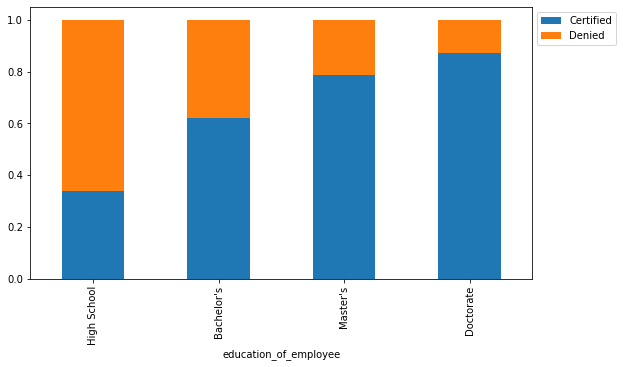



Totals
case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192


Percentages
case_status            Certified    Denied
education_of_employee                     
High School             0.340351  0.659649
Bachelor's              0.622142  0.377858
All                     0.667896  0.332104
Master's                0.786278  0.213722
Doctorate               0.872263  0.127737
------------------------------------------------------------------------------------------------------------------------


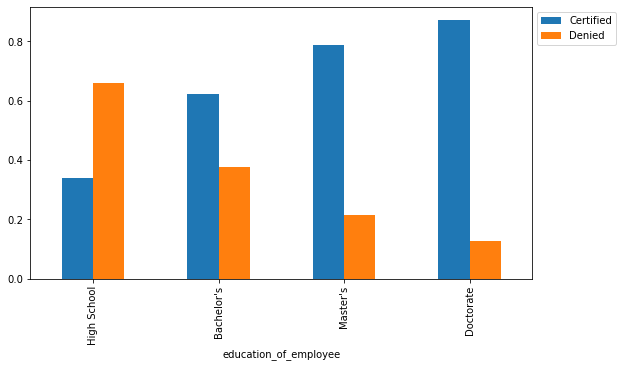

<IPython.core.display.Javascript object>

In [60]:
stacked_barplot(df, "education_of_employee", "case_status")
print("\n")
side_barplot(df, "education_of_employee", "case_status")

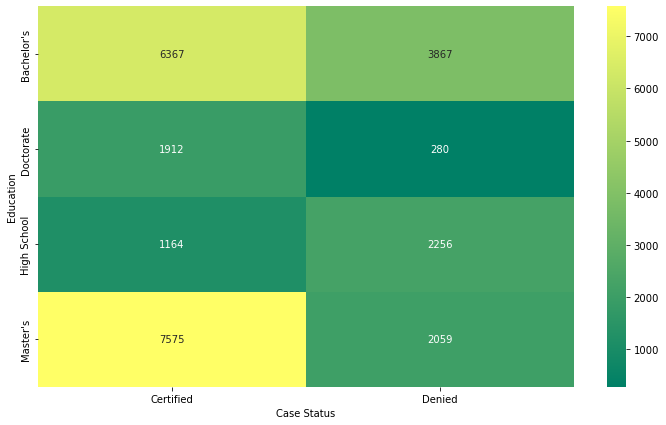

<IPython.core.display.Javascript object>

In [106]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    pd.crosstab(df["education_of_employee"], df["case_status"]),
    annot=True,
    fmt="g",
    cmap="summer",
)

plt.ylabel("Education")
plt.xlabel("Case Status")
plt.show()

### Observations  
* As mentioned in the historial overview section, the applicants with the highest education are the likely to want to immigate and to have the best chance of doing it
* Doctorate holders are the smallest group, but they have the highest rate of acceptance 
* Master's holders have a high acceptance rate also 
* Bachelor's holders have a roughly two-thirds acceptance rate while this is not great, it is still pretty good
* The lowest acceptance rate is for people with only a High School level of eduction 
* It pays to be well educated 

### Analysis of Education and Visa Certification by Each Region 

Do the analysis of education and visa certification by each region to determine if there is any pattern or patters to which level of eduction is certified the most.

Analysis for continent: Asia
Totals
case_status            Certified  Denied    All
education_of_employee                          
All                        11012    5849  16861
Bachelor's                  4407    2761   7168
High School                  676    1614   2290
Master's                    5149    1331   6480
Doctorate                    780     143    923


Percentages
case_status            Certified    Denied
education_of_employee                     
High School             0.295197  0.704803
Bachelor's              0.614816  0.385184
All                     0.653105  0.346895
Master's                0.794599  0.205401
Doctorate               0.845070  0.154930
------------------------------------------------------------------------------------------------------------------------


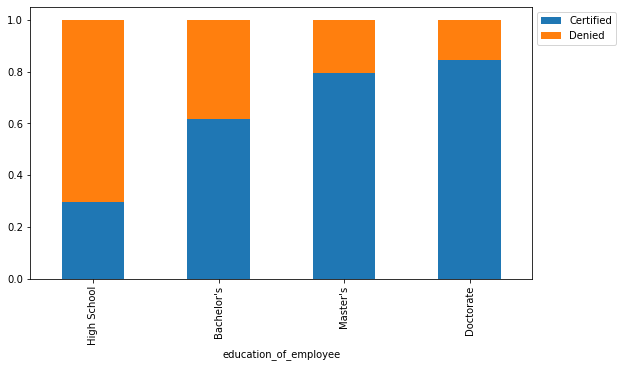



Totals
case_status            Certified  Denied    All
education_of_employee                          
All                        11012    5849  16861
Bachelor's                  4407    2761   7168
High School                  676    1614   2290
Master's                    5149    1331   6480
Doctorate                    780     143    923


Percentages
case_status            Certified    Denied
education_of_employee                     
High School             0.295197  0.704803
Bachelor's              0.614816  0.385184
All                     0.653105  0.346895
Master's                0.794599  0.205401
Doctorate               0.845070  0.154930
------------------------------------------------------------------------------------------------------------------------


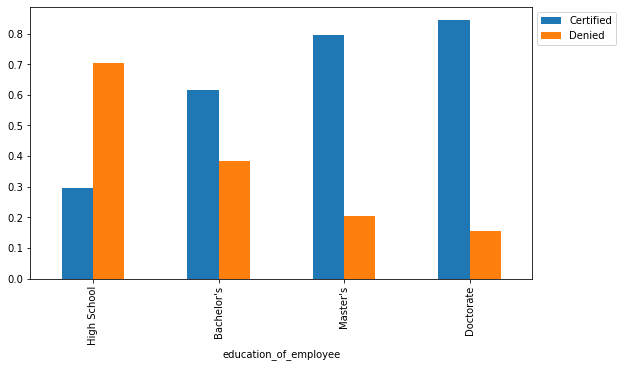


,

Analysis for continent: Africa
Totals
case_status            Certified  Denied  All
education_of_employee                        
All                          397     154  551
Bachelor's                    81      62  143
High School                   23      43   66
Master's                     250      38  288
Doctorate                     43      11   54


Percentages
case_status            Certified    Denied
education_of_employee                     
High School             0.348485  0.651515
Bachelor's              0.566434  0.433566
All                     0.720508  0.279492
Doctorate               0.796296  0.203704
Master's                0.868056  0.131944
------------------------------------------------------------------------------------------------------------------------


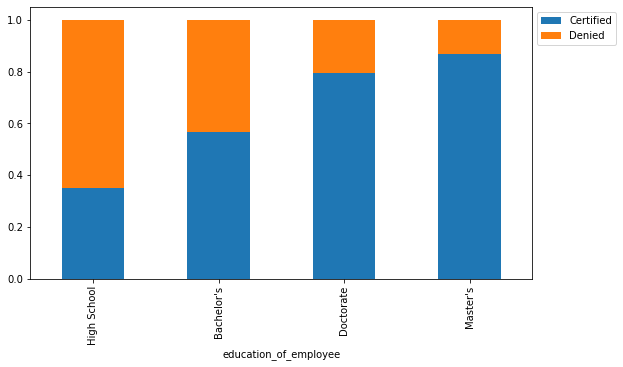



Totals
case_status            Certified  Denied  All
education_of_employee                        
All                          397     154  551
Bachelor's                    81      62  143
High School                   23      43   66
Master's                     250      38  288
Doctorate                     43      11   54


Percentages
case_status            Certified    Denied
education_of_employee                     
High School             0.348485  0.651515
Bachelor's              0.566434  0.433566
All                     0.720508  0.279492
Doctorate               0.796296  0.203704
Master's                0.868056  0.131944
------------------------------------------------------------------------------------------------------------------------


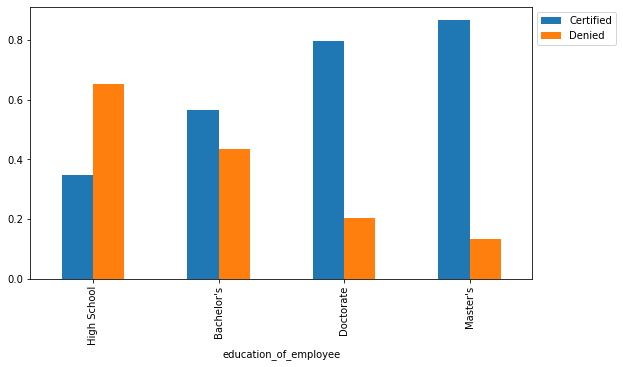


,

Analysis for continent: North America
Totals
case_status            Certified  Denied   All
education_of_employee                         
All                         2037    1255  3292
Bachelor's                   641     584  1225
Master's                     979     429  1408
High School                  210     191   401
Doctorate                    207      51   258


Percentages
case_status            Certified    Denied
education_of_employee                     
Bachelor's              0.523265  0.476735
High School             0.523691  0.476309
All                     0.618773  0.381227
Master's                0.695312  0.304688
Doctorate               0.802326  0.197674
------------------------------------------------------------------------------------------------------------------------


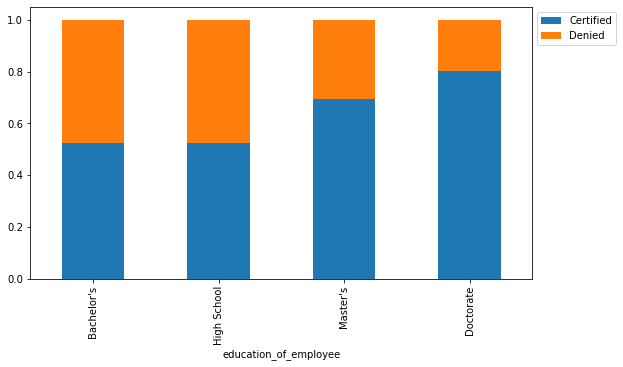



Totals
case_status            Certified  Denied   All
education_of_employee                         
All                         2037    1255  3292
Bachelor's                   641     584  1225
Master's                     979     429  1408
High School                  210     191   401
Doctorate                    207      51   258


Percentages
case_status            Certified    Denied
education_of_employee                     
Bachelor's              0.523265  0.476735
High School             0.523691  0.476309
All                     0.618773  0.381227
Master's                0.695312  0.304688
Doctorate               0.802326  0.197674
------------------------------------------------------------------------------------------------------------------------


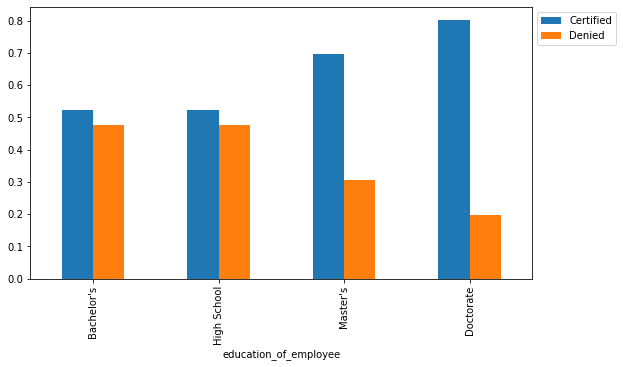


,

Analysis for continent: Europe
Totals
case_status            Certified  Denied   All
education_of_employee                         
All                         2957     775  3732
High School                  162     328   490
Bachelor's                  1040     259  1299
Master's                     967     130  1097
Doctorate                    788      58   846


Percentages
case_status            Certified    Denied
education_of_employee                     
High School             0.330612  0.669388
All                     0.792337  0.207663
Bachelor's              0.800616  0.199384
Master's                0.881495  0.118505
Doctorate               0.931442  0.068558
------------------------------------------------------------------------------------------------------------------------


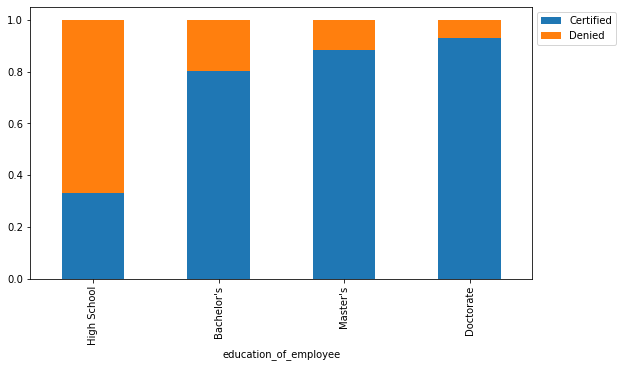



Totals
case_status            Certified  Denied   All
education_of_employee                         
All                         2957     775  3732
High School                  162     328   490
Bachelor's                  1040     259  1299
Master's                     967     130  1097
Doctorate                    788      58   846


Percentages
case_status            Certified    Denied
education_of_employee                     
High School             0.330612  0.669388
All                     0.792337  0.207663
Bachelor's              0.800616  0.199384
Master's                0.881495  0.118505
Doctorate               0.931442  0.068558
------------------------------------------------------------------------------------------------------------------------


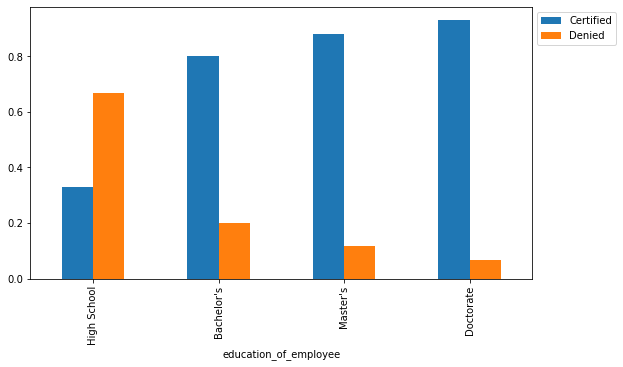


,

Analysis for continent: South America
Totals
case_status            Certified  Denied  All
education_of_employee                        
All                          493     359  852
Bachelor's                   160     173  333
Master's                     184     109  293
High School                   74      63  137
Doctorate                     75      14   89


Percentages
case_status            Certified    Denied
education_of_employee                     
Bachelor's              0.480480  0.519520
High School             0.540146  0.459854
All                     0.578638  0.421362
Master's                0.627986  0.372014
Doctorate               0.842697  0.157303
------------------------------------------------------------------------------------------------------------------------


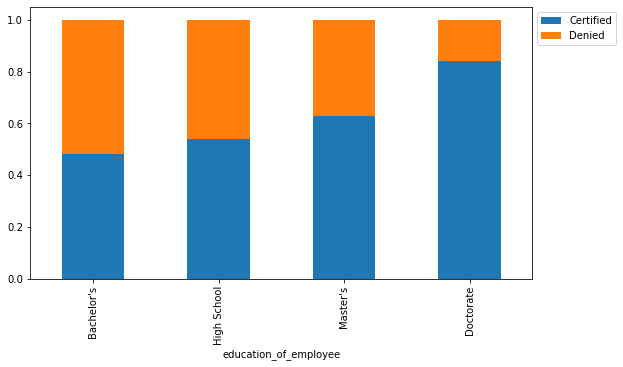



Totals
case_status            Certified  Denied  All
education_of_employee                        
All                          493     359  852
Bachelor's                   160     173  333
Master's                     184     109  293
High School                   74      63  137
Doctorate                     75      14   89


Percentages
case_status            Certified    Denied
education_of_employee                     
Bachelor's              0.480480  0.519520
High School             0.540146  0.459854
All                     0.578638  0.421362
Master's                0.627986  0.372014
Doctorate               0.842697  0.157303
------------------------------------------------------------------------------------------------------------------------


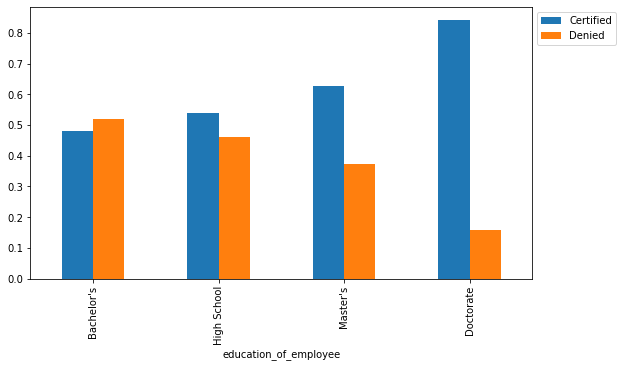


,

Analysis for continent: Oceania
Totals
case_status            Certified  Denied  All
education_of_employee                        
All                          122      70  192
Bachelor's                    38      28   66
Master's                      46      22   68
High School                   19      17   36
Doctorate                     19       3   22


Percentages
case_status            Certified    Denied
education_of_employee                     
High School             0.527778  0.472222
Bachelor's              0.575758  0.424242
All                     0.635417  0.364583
Master's                0.676471  0.323529
Doctorate               0.863636  0.136364
------------------------------------------------------------------------------------------------------------------------


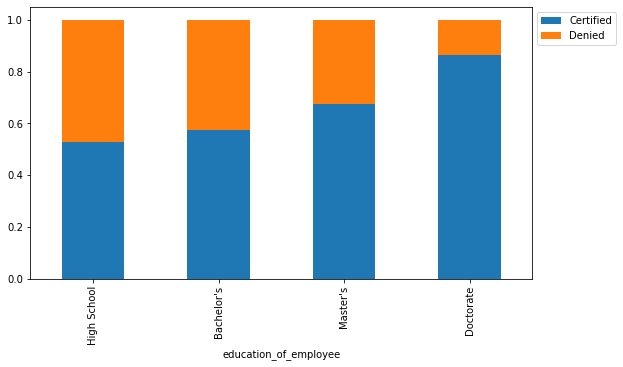



Totals
case_status            Certified  Denied  All
education_of_employee                        
All                          122      70  192
Bachelor's                    38      28   66
Master's                      46      22   68
High School                   19      17   36
Doctorate                     19       3   22


Percentages
case_status            Certified    Denied
education_of_employee                     
High School             0.527778  0.472222
Bachelor's              0.575758  0.424242
All                     0.635417  0.364583
Master's                0.676471  0.323529
Doctorate               0.863636  0.136364
------------------------------------------------------------------------------------------------------------------------


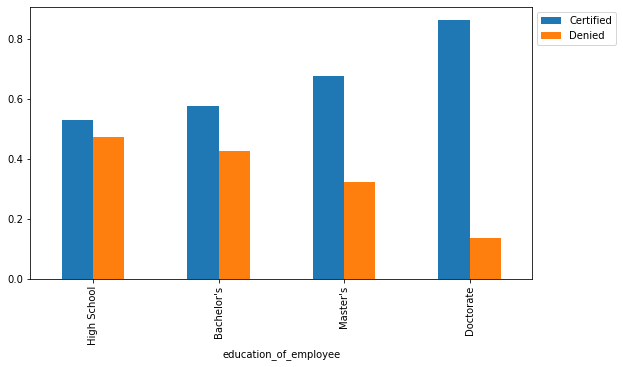


,

Wall time: 1.84 s


<IPython.core.display.Javascript object>

In [69]:
%%time

cont = df["continent"].unique().tolist()
for x in cont:
    temp2df = df[df["continent"] == x]
    print("Analysis for continent:", x)
    stacked_barplot(temp2df, "education_of_employee", "case_status")
    print("\n")
    side_barplot(temp2df, "education_of_employee", "case_status")
    print("\n,\n")

del temp2df  # free memory

### Summary of Degrees by Region 

A listing of the continents, level of education, and percentage of successful certification

| Continent | Doctorate | Master's | Bachelor's | High School |
| --- | --- | --- | --- | --- | 
| Asia | 0.845070 | 0.794599 | 0.614816 | 0.295197 |
| Africa | 0.796296 | 0.868056 | 0.566434 | 0.348485 |
| North America | 0.802326 | 0.695312 | 0.523265 | 0.523691 |
| Europe | 0.931442 | 0.881495 | 0.800616 | 0.330612 |
| South America | 0.842697 | 0.627986 | 0.48048 | 0.540146 | 
| Oceania | 0.863636 | 0.676471 | 0.575758 | 0.527778 |



### Observations  
* For all regions, the best chance of getting certified is to have a Doctorate or Master's 
    * Europe has the highest certification for Doctorates (93.14%) and Master's (88.15%) 
    * Africa has the lowest chance for doctorates getting certified (79.63%) but the chances are still pretty good 
* For all regions, the least chance of getting certified to to have only a High School diploma 
    * The chances of getting certified with only a High School diploma are about even in North America, South America, and Oceania 
    * The chances of getting certified with only a High School diploma are very low for Asia (29.51%) and Europe (33.06%) 
* For Master's degrees: 
    * The chances of getting certified with a Master's degree are the best for Africa (86.81%) and Europe (88.15%) 
    * The chances of getting certified with a Master's degree are very good for Asia (79.46%)
    * The chances of getting certified with a Master's degree are between 60% and 70% for the other regions 
        * The chances of getting certified are still good 
    * There is a better chance for getting certified if you are from Africa with Master's rather than a Doctorate 
        * This is an exception  
* For Bachelor's degrees: 
    * The chances of getting certified with a Bachelor's degree are the best for Europe (80.06%) 
    * The chances of getting certified with a Bachelor's degree are the least for South America (48.04%) 
    * The chances of getting certified with a Bachelor's degree are between 50% and 60% for the other regions 
        * The chances are good, but not great 
* Overall 
    * It is best to be from Europe 
    * It is the most disadvantageous to be from South America 


### Analysis of Education and Region of Employment

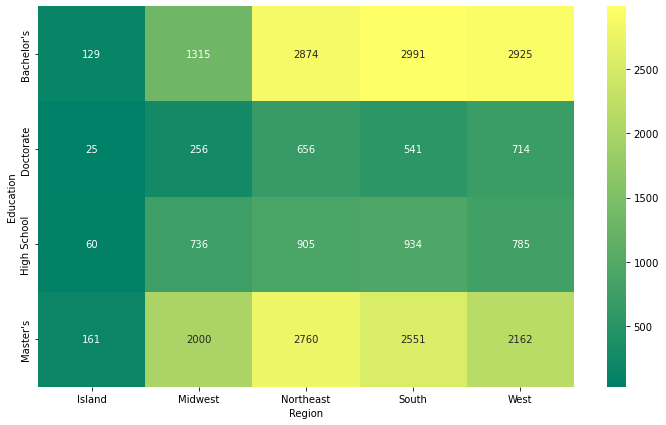

<IPython.core.display.Javascript object>

In [107]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    pd.crosstab(df["education_of_employee"], df["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="summer",
)

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

### Observations 
* As seen in the bar plot, the lowest number of people went to the Island region 
    * Assuming the Island region is Hawaii 
* Applicants with Bachelor's degrees like working in the Northeast, South, and West regions 
* Applicants with Master's degrees like the Northeast and South regions the most followed by the West and Midwest 
* Applicants with Doctorates like the Northeast and West regions the most followed by South and Midwest 
* Applicants with High School education like the Northest and South the most follow by West and Midwest 
* If a guess had to be made on where an applicant would go, it would be Northeast as everyone likes that region 


### Anaylsis of Continent and Region of Employment

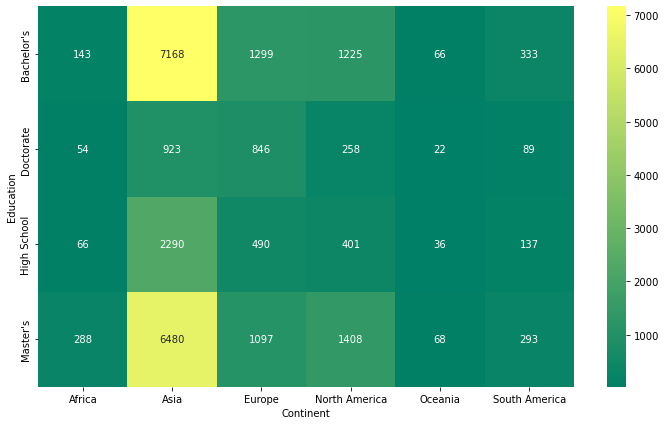

<IPython.core.display.Javascript object>

In [108]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    pd.crosstab(df["education_of_employee"], df["continent"]),
    annot=True,
    fmt="g",
    cmap="summer",
)

plt.ylabel("Education")
plt.xlabel("Continent")
plt.show()

### Observations 
* Most applicants from all continents have either a Bachelor's or Master's degree 
    * This is consistent with the bar plots 
* The most doctorate applicants come from Asia and Europe followed by North America 
* The distribution of degree types of the continents is rougly the same 

### Analysis of Continent and Region of Employment

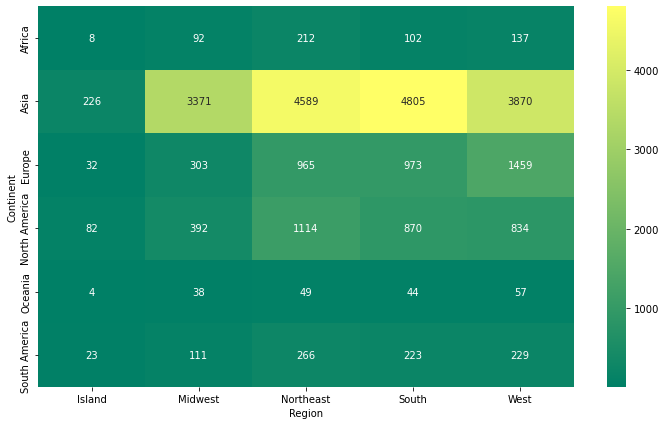

<IPython.core.display.Javascript object>

In [109]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    pd.crosstab(df["continent"], df["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="summer",
)

plt.ylabel("Continent")
plt.xlabel("Region")
plt.show()

### Observations 
* As seen before, the Northeast, South, and West regions are the most popular 
* Applicants from Asia like the Northeast and South regions the most 
* Midwest is the least popular region in the continential USA 

 ### Analysis of Percentage of Visa Certifications Across Each Region

Totals
region_of_employment  Island  Midwest  Northeast  South  West    All
case_status                                                         
All                      375     4307       7195   7017  6586  25480
Certified                226     3253       4526   4913  4100  17018
Denied                   149     1054       2669   2104  2486   8462


Percentages
region_of_employment    Island   Midwest  Northeast     South      West
case_status                                                            
Denied                0.017608  0.124557   0.315410  0.248641  0.293784
All                   0.014717  0.169035   0.282378  0.275392  0.258477
Certified             0.013280  0.191151   0.265954  0.288694  0.240921
------------------------------------------------------------------------------------------------------------------------


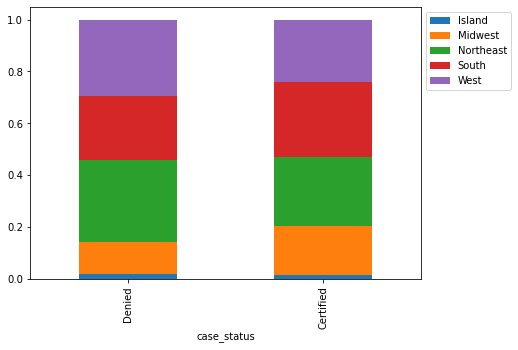



Totals
region_of_employment  Island  Midwest  Northeast  South  West    All
case_status                                                         
All                      375     4307       7195   7017  6586  25480
Certified                226     3253       4526   4913  4100  17018
Denied                   149     1054       2669   2104  2486   8462


Percentages
region_of_employment    Island   Midwest  Northeast     South      West
case_status                                                            
Denied                0.017608  0.124557   0.315410  0.248641  0.293784
All                   0.014717  0.169035   0.282378  0.275392  0.258477
Certified             0.013280  0.191151   0.265954  0.288694  0.240921
------------------------------------------------------------------------------------------------------------------------


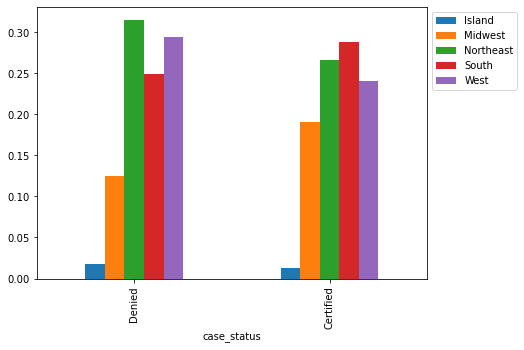

<IPython.core.display.Javascript object>

In [61]:
stacked_barplot(df, "case_status", "region_of_employment")
print("\n")
side_barplot(df, "case_status", "region_of_employment")

### Observations 
* Best chance of getting certified if the job is in the South or Northeast 
* Best change of getting Denied if the job is in the Northeast 
* There appears to be a low correlation between getting certified and region 
    * The numbers are bascially the same 

  ### Analysis of Visa Status Across Different Continents

Totals
continent    Africa   Asia  Europe  North America  Oceania  South America  \
case_status                                                                 
All             551  16861    3732           3292      192            852   
Certified       397  11012    2957           2037      122            493   
Denied          154   5849     775           1255       70            359   

continent      All  
case_status         
All          25480  
Certified    17018  
Denied        8462  


Percentages
continent      Africa      Asia    Europe  North America   Oceania  \
case_status                                                          
Denied       0.018199  0.691208  0.091586       0.148310  0.008272   
All          0.021625  0.661735  0.146468       0.129199  0.007535   
Certified    0.023328  0.647080  0.173757       0.119697  0.007169   

continent    South America  
case_status                 
Denied            0.042425  
All               0.033438  
Certified         0.0

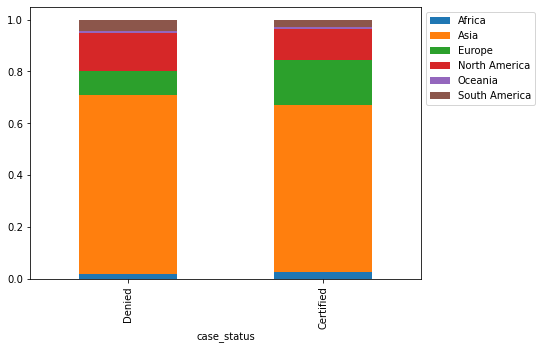



Totals
continent    Africa   Asia  Europe  North America  Oceania  South America  \
case_status                                                                 
All             551  16861    3732           3292      192            852   
Certified       397  11012    2957           2037      122            493   
Denied          154   5849     775           1255       70            359   

continent      All  
case_status         
All          25480  
Certified    17018  
Denied        8462  


Percentages
continent      Africa      Asia    Europe  North America   Oceania  \
case_status                                                          
Denied       0.018199  0.691208  0.091586       0.148310  0.008272   
All          0.021625  0.661735  0.146468       0.129199  0.007535   
Certified    0.023328  0.647080  0.173757       0.119697  0.007169   

continent    South America  
case_status                 
Denied            0.042425  
All               0.033438  
Certified         0

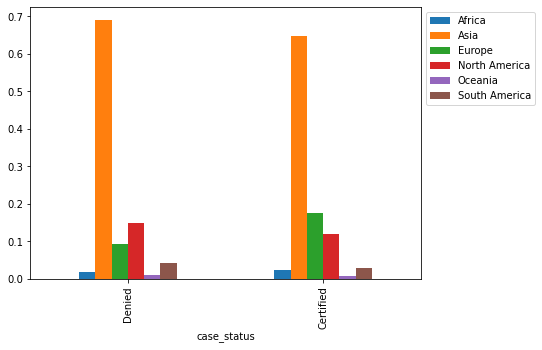

<IPython.core.display.Javascript object>

In [62]:
stacked_barplot(df, "case_status", "continent")
print("\n")
side_barplot(df, "case_status", "continent")

### Observations 
* The most certified and denied come from Asia, but Asia has the most applicants 
* There is a sightly better chance of getting certified if the applicant is from Europe 
* Overall, low correlation between visa status across different continents
    * The numbers are roughly close to each other 

 ### Analysis of Work Experience Influencing Visa Certification

Totals
has_job_experience      N      Y    All
case_status                            
All                 10678  14802  25480
Certified            5994  11024  17018
Denied               4684   3778   8462


Percentages
has_job_experience         N         Y
case_status                           
Denied              0.553533  0.446467
All                 0.419074  0.580926
Certified           0.352215  0.647785
------------------------------------------------------------------------------------------------------------------------


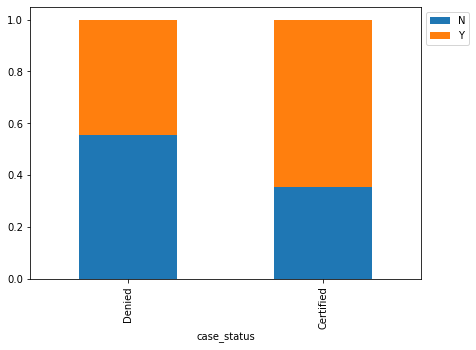



Totals
has_job_experience      N      Y    All
case_status                            
All                 10678  14802  25480
Certified            5994  11024  17018
Denied               4684   3778   8462


Percentages
has_job_experience         N         Y
case_status                           
Denied              0.553533  0.446467
All                 0.419074  0.580926
Certified           0.352215  0.647785
------------------------------------------------------------------------------------------------------------------------


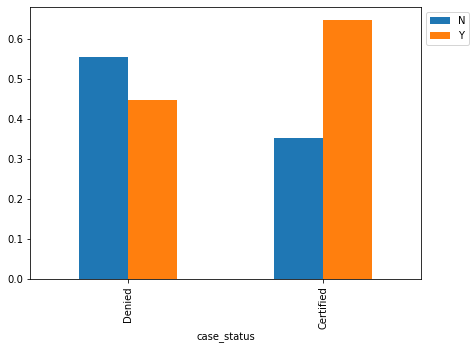

<IPython.core.display.Javascript object>

In [63]:
stacked_barplot(df, "case_status", "has_job_experience")
print("\n")
side_barplot(df, "case_status", "has_job_experience")

### Observations 
* It is clear that work experience makes a difference in getting certified 
* It is also clear that not having work experience leaves the claimant with a good chance of being denied 
* Having work experience and also advanced education are two key drivers to getting certified 

 ### Analysis of Requires Job Training Influencing Visa Certification

Totals
requires_job_training      N     Y    All
case_status                              
All                    22525  2955  25480
Certified              15012  2006  17018
Denied                  7513   949   8462


Percentages
requires_job_training         N         Y
case_status                              
Certified              0.882125  0.117875
All                    0.884027  0.115973
Denied                 0.887852  0.112148
------------------------------------------------------------------------------------------------------------------------


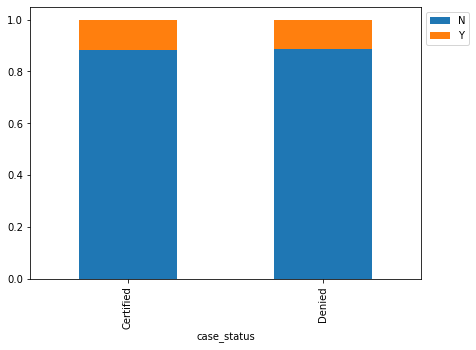



Totals
requires_job_training      N     Y    All
case_status                              
All                    22525  2955  25480
Certified              15012  2006  17018
Denied                  7513   949   8462


Percentages
requires_job_training         N         Y
case_status                              
Certified              0.882125  0.117875
All                    0.884027  0.115973
Denied                 0.887852  0.112148
------------------------------------------------------------------------------------------------------------------------


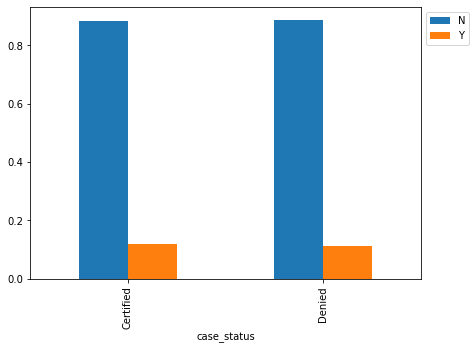

<IPython.core.display.Javascript object>

In [64]:
stacked_barplot(df, "case_status", "requires_job_training")
print("\n")
side_barplot(df, "case_status", "requires_job_training")

### Observations 
* The assumption is if job training is needed, the increases the chance of denial 
* However, the numbers do not supporr this 
* The percentages between needing and not needing job training and certification and denial are roughly the same 
* There is a low correlation between visa status and needed job training 

  ### Analysis of Employees with Prior Work Experience Requiring Job Training

Totals
requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802


Percentages
requires_job_training         N         Y
has_job_experience                       
N                      0.841731  0.158269
All                    0.884027  0.115973
Y                      0.914539  0.085461
------------------------------------------------------------------------------------------------------------------------


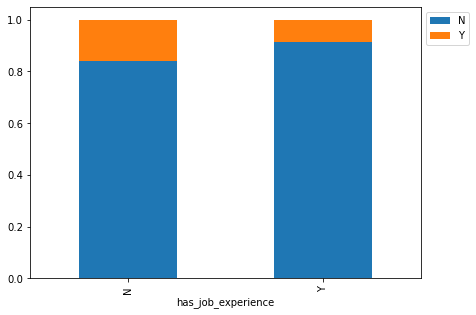



Totals
requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802


Percentages
requires_job_training         N         Y
has_job_experience                       
N                      0.841731  0.158269
All                    0.884027  0.115973
Y                      0.914539  0.085461
------------------------------------------------------------------------------------------------------------------------


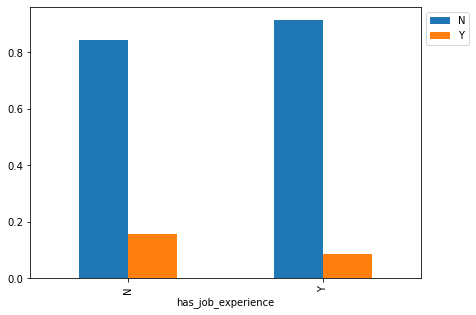

<IPython.core.display.Javascript object>

In [65]:
stacked_barplot(df, "has_job_experience", "requires_job_training")
print("\n")
side_barplot(df, "has_job_experience", "requires_job_training")

### Observations 
* The numbers for having experience and requires job training are roughly the same 
* Low correlation between having experience and requires job training 


 ### Analysis of Visa Status Changes with Prevailing Wage

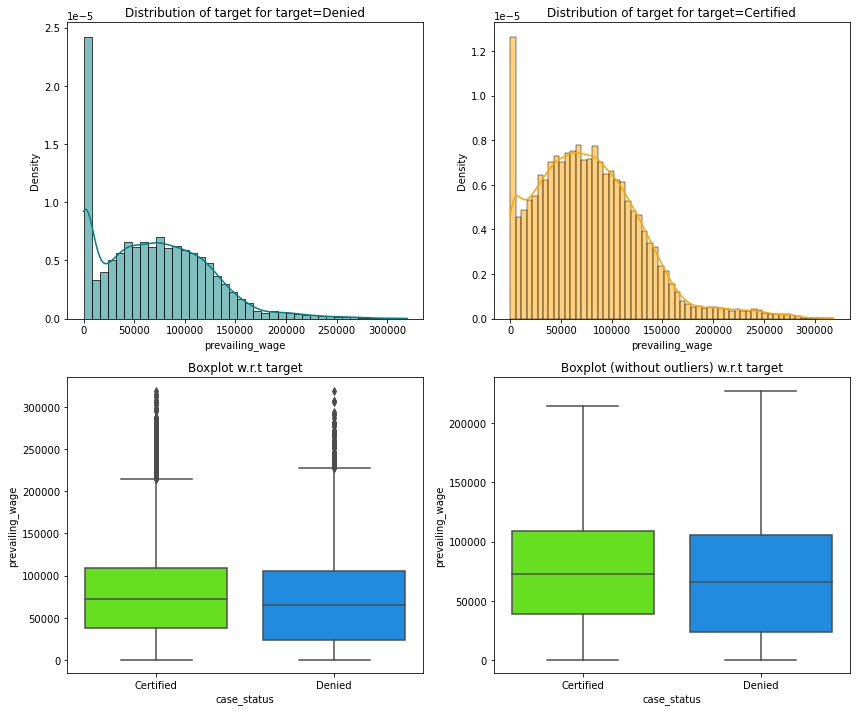

Wall time: 506 ms


<IPython.core.display.Javascript object>

In [115]:
%%time

distribution_plot_wrt_target(df, "prevailing_wage", "case_status" )

### Observations 
* Both histograms are right skewed with a long right tail 
* Both box plot are about the same with roughly similar medians 
    * This is the same for the plots with and without outliers 
* Both sets of charts are roughly the same 
* There is a low correlation between visa status changes with prevailing wage

 ### Analysis of Prevailing Wage Similarities Across USA 

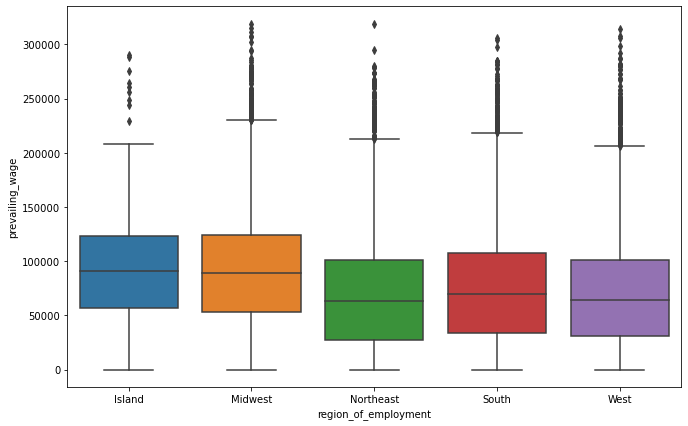

<IPython.core.display.Javascript object>

In [116]:
plt.figure(figsize=(11, 7))
sns.boxplot(data=df, x="region_of_employment", y="prevailing_wage")
plt.show()

### Observations 
* The Island and Midwest regions have roughly the same median prevailing wage 
* The Northest, South, and West regions have roughly the same median prevailing wage
* The spread bewteen Q1 and Q3 is roughly the same for all regions 
* There are many outliers at high end of the prevailing wage scale for all regions 
* There are more outliers at high end of the prevailing wage scale for Midwest, Northest, South, and West as opposed to Island


 ### Analysis of Different Units of Prevailing Wage Impact on Visa Applications Certification

Totals
case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89


Percentages
case_status   Certified    Denied
unit_of_wage                     
Hour           0.346314  0.653686
Month          0.617978  0.382022
Week           0.621324  0.378676
All            0.667896  0.332104
Year           0.698850  0.301150
------------------------------------------------------------------------------------------------------------------------


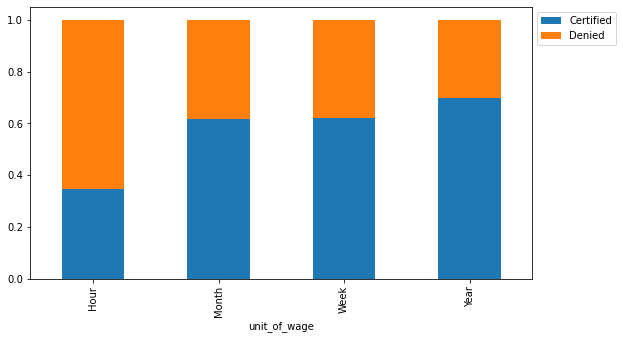



Totals
case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89


Percentages
case_status   Certified    Denied
unit_of_wage                     
Hour           0.346314  0.653686
Month          0.617978  0.382022
Week           0.621324  0.378676
All            0.667896  0.332104
Year           0.698850  0.301150
------------------------------------------------------------------------------------------------------------------------


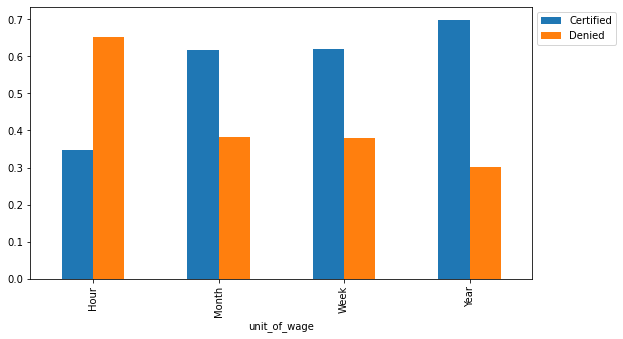

<IPython.core.display.Javascript object>

In [66]:
stacked_barplot(df, "unit_of_wage", "case_status")
print("\n")
side_barplot(df, "unit_of_wage", "case_status")

### Observations  
* It is clear that if the wage type is hour, there is a very good chance of denial 
* It is clear that for the other wage types, there is a good chance of getting certified 
* Like education, the wage type is a clear driver of getting certified

## Note to Reviewer
The data from the univariant and bivariant sections will be summarized in the Actionable Insights section 

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [118]:
print("Check for Null Values and Percentage of rows that have null values")
pd.DataFrame(
    {
        "Count": df.isnull().sum()[df.isnull().sum() > 0],
        "Percentage": (df.isnull().sum()[df.isnull().sum() > 0] / df.shape[0]) * 100,
    }
)

Check for Null Values and Percentage of rows that have null values


,Count,Percentage


<IPython.core.display.Javascript object>

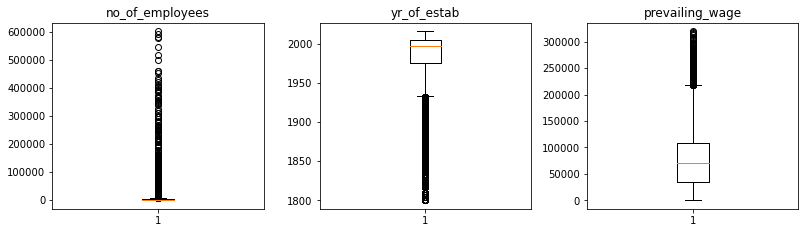

Wall time: 203 ms


<IPython.core.display.Javascript object>

In [120]:
%%time                

num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Outlier Treatment
I am not going to treat the outliers as it is inheritant in the data.
</br>
Treating outliers would have a big change on the data and results.
</br>
As we saw in the univariant section, there is a large variance in the numerical columns with the year of establishment covering 2016 years.  The number of employees also has a wide range.  The data has to be processed as-is.  

## EDA

- It is a good idea to explore the data once again after manipulating it.

continent with percentage of total 

               continent  Percentage
Asia               16861    0.661735
Europe              3732    0.146468
North America       3292    0.129199
South America        852    0.033438
Africa               551    0.021625
Oceania              192    0.007535
--------------------------------------------------




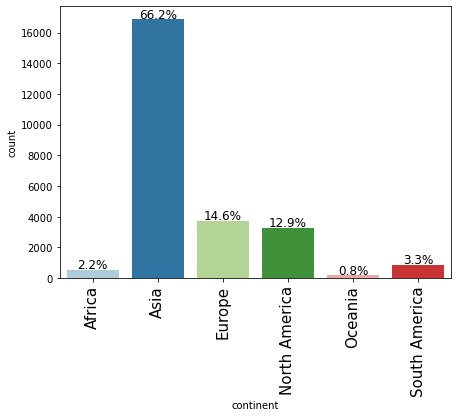

<IPython.core.display.Javascript object>

In [121]:
count_percentage(df, "continent")
print("-" * 50)
print("\n")
labeled_barplot(df, "continent")

education_of_employee with percentage of total 

             education_of_employee  Percentage
Bachelor's                   10234    0.401648
Master's                      9634    0.378100
High School                   3420    0.134223
Doctorate                     2192    0.086028
--------------------------------------------------




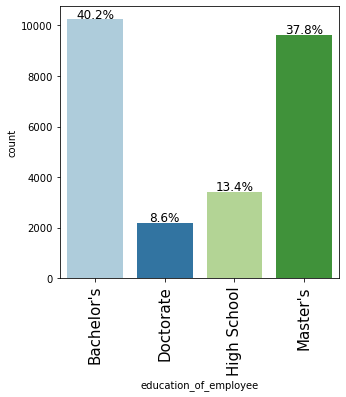

<IPython.core.display.Javascript object>

In [122]:
count_percentage(df, "education_of_employee")
print("-" * 50)
print("\n")
labeled_barplot(df, "education_of_employee")

has_job_experience with percentage of total 

   has_job_experience  Percentage
Y               14802    0.580926
N               10678    0.419074
--------------------------------------------------




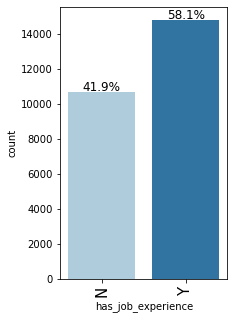

<IPython.core.display.Javascript object>

In [123]:
count_percentage(df, "has_job_experience")
print("-" * 50)
print("\n")
labeled_barplot(df, "has_job_experience")

requires_job_training with percentage of total 

   requires_job_training  Percentage
N                  22525    0.884027
Y                   2955    0.115973
--------------------------------------------------




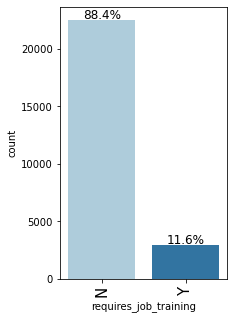

<IPython.core.display.Javascript object>

In [124]:
count_percentage(df, "requires_job_training")
print("-" * 50)
print("\n")
labeled_barplot(df, "requires_job_training")

no_of_employees with percentage of total 

       no_of_employees  Percentage
183                 18    0.000706
854                 16    0.000628
724                 16    0.000628
766                 15    0.000589
1476                15    0.000589
...                ...         ...
5876                 1    0.000039
5536                 1    0.000039
47866                1    0.000039
4700                 1    0.000039
40224                1    0.000039

[7105 rows x 2 columns]
--------------------------------------------------




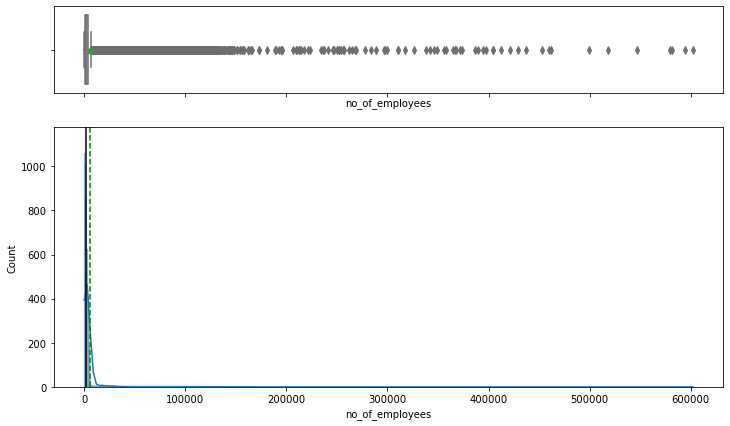

<IPython.core.display.Javascript object>

In [125]:
count_percentage(df, "no_of_employees")
print("-" * 50)
print("\n")
histogram_boxplot(df, "no_of_employees")

yr_of_estab with percentage of total 

      yr_of_estab  Percentage
1998         1134    0.044505
2005         1051    0.041248
2001         1017    0.039914
2007          994    0.039011
1999          870    0.034144
...           ...         ...
1842            6    0.000235
1846            4    0.000157
1822            4    0.000157
1810            3    0.000118
1824            2    0.000078

[199 rows x 2 columns]
--------------------------------------------------




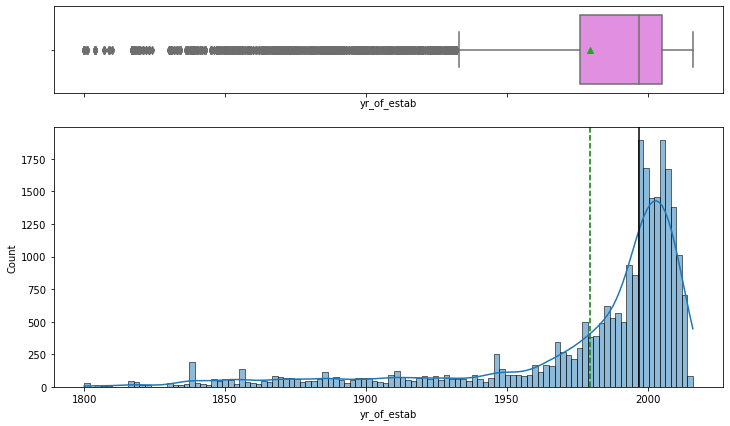

<IPython.core.display.Javascript object>

In [126]:
count_percentage(df, "yr_of_estab")
print("-" * 50)
print("\n")
histogram_boxplot(df, "yr_of_estab")

region_of_employment with percentage of total 

           region_of_employment  Percentage
Northeast                  7195    0.282378
South                      7017    0.275392
West                       6586    0.258477
Midwest                    4307    0.169035
Island                      375    0.014717
--------------------------------------------------




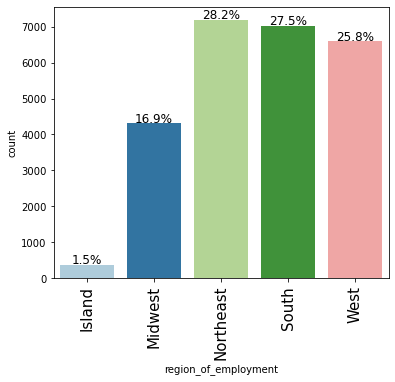

<IPython.core.display.Javascript object>

In [127]:
count_percentage(df, "region_of_employment")
print("-" * 50)
print("\n")
labeled_barplot(df, "region_of_employment")

prevailing_wage with percentage of total 

             prevailing_wage  Percentage
82560.2800                 2    0.000078
122.6500                   2    0.000078
60948.1500                 2    0.000078
64357.5800                 2    0.000078
108.1200                   2    0.000078
...                      ...         ...
25713.9800                 1    0.000039
101656.6400                1    0.000039
65665.5500                 1    0.000039
50.8813                    1    0.000039
70876.9100                 1    0.000039

[25454 rows x 2 columns]
--------------------------------------------------




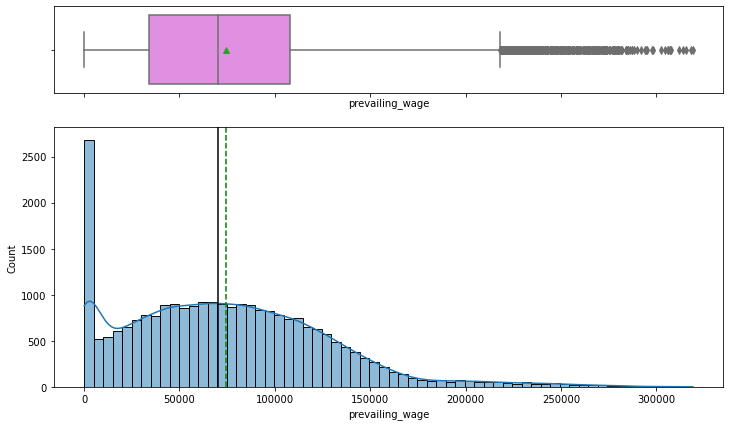

<IPython.core.display.Javascript object>

In [128]:
count_percentage(df, "prevailing_wage")
print("-" * 50)
print("\n")
histogram_boxplot(df, "prevailing_wage")

unit_of_wage with percentage of total 

       unit_of_wage  Percentage
Year          22962    0.901177
Hour           2157    0.084655
Week            272    0.010675
Month            89    0.003493
--------------------------------------------------




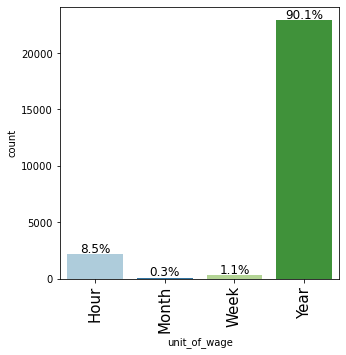

<IPython.core.display.Javascript object>

In [129]:
count_percentage(df, "unit_of_wage")
print("-" * 50)
print("\n")
labeled_barplot(df, "unit_of_wage")

full_time_position with percentage of total 

   full_time_position  Percentage
Y               22773     0.89376
N                2707     0.10624
--------------------------------------------------




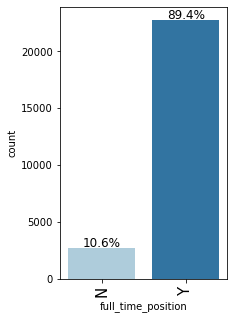

<IPython.core.display.Javascript object>

In [130]:
count_percentage(df, "full_time_position")
print("-" * 50)
print("\n")
labeled_barplot(df, "full_time_position")

case_status with percentage of total 

           case_status  Percentage
Certified        17018    0.667896
Denied            8462    0.332104
--------------------------------------------------




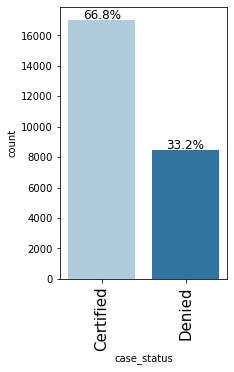

<IPython.core.display.Javascript object>

In [131]:
count_percentage(df, "case_status")
print("-" * 50)
print("\n")
labeled_barplot(df, "case_status")

## Data Preparation for Modeling

In [12]:
# Making backup copy of dataframe

# df.to_csv("C:/Users/David/temp/EasyVisa_transformed.csv", index=False)


# Read command if needed
df = pd.read_csv("C:/Users/David/temp/EasyVisa_transformed.csv")

<IPython.core.display.Javascript object>

### Split the data

In [13]:
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

# Independent variables
X = df.drop(["case_status"], axis=1)
# Dependent variable
Y = df["case_status"]

print("Independent Variables")
print(X.head())
print("\n\nDependent Variable")
Y.head()

Independent Variables
  continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  N                     N   
1      Asia              Master's                  Y                     N   
2      Asia            Bachelor's                  N                     Y   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   

   no_of_employees  yr_of_estab region_of_employment  prevailing_wage  \
0            14513         2007                 West         592.2029   
1             2412         2002            Northeast       83425.6500   
2            44444         2008                 West      122996.8600   
3               98         1897                 West       83434.0300   
4             1082         2005                South      149907.3900   

  unit_of_wage full_time_position  
0         Hour                  Y 

0    0
1    1
2    0
3    0
4    1
Name: case_status, dtype: int64

<IPython.core.display.Javascript object>

### Add intercept to independent variables

In [14]:
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

### Create Dummy Variables

In [15]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,const,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,1.0,14513,2007,592.2029,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,1.0,2412,2002,83425.6500,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1
2,1.0,44444,2008,122996.8600,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
3,1.0,98,1897,83434.0300,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,1.0,1082,2005,149907.3900,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1


<IPython.core.display.Javascript object>

### Split the independent data 70:30 into train and test

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [17]:
print(
    "For training data, there are",
    X_train.shape[0],
    "rows and",
    X_train.shape[1],
    "columns.",
)
print(
    "For test data, there are",
    X_test.shape[0],
    "rows and",
    X_test.shape[1],
    "columns.",
)

print("\n")
print("Percentage of classes in training set:")
print(Y_train.value_counts(normalize=True))
print("\nPercentage of classes in test set:")
print(Y_test.value_counts(normalize=True))

For training data, there are 17836 rows and 22 columns.
For test data, there are 7644 rows and 22 columns.


Percentage of classes in training set:
1    0.663602
0    0.336398
Name: case_status, dtype: float64

Percentage of classes in test set:
1    0.677917
0    0.322083
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

### Build Decision Tree Model

In [292]:
# DataFrame to hold results of model performance

models_train_comp_df = pd.DataFrame()
models_test_comp_df = pd.DataFrame()

<IPython.core.display.Javascript object>

In [293]:
dTree = DecisionTreeClassifier(random_state=1)
dTree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Check Performance on Training Set

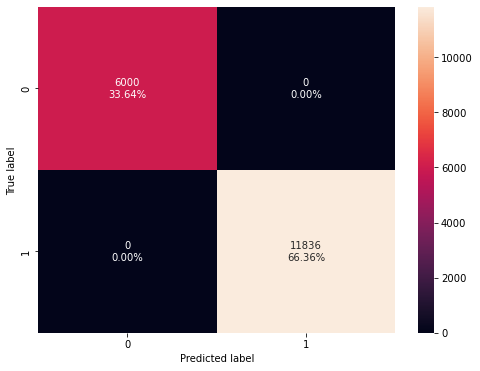

<IPython.core.display.Javascript object>

In [294]:
confusion_matrix_sklearn(dTree, X_train, Y_train)

In [295]:
decision_tree_perf_train = model_performance_classification_sklearn(
    dTree, X_train, Y_train
)
decision_tree_perf_train.T

,0
Accuracy,1.0
Recall,1.0
Precision,1.0
F1,1.0


<IPython.core.display.Javascript object>

In [296]:
models_train_comp_df["Baseline"] = pd.concat([decision_tree_perf_train.T], axis=1,)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Baseline
Accuracy,1.0
Recall,1.0
Precision,1.0
F1,1.0


<IPython.core.display.Javascript object>

### Check Performance on Test Set

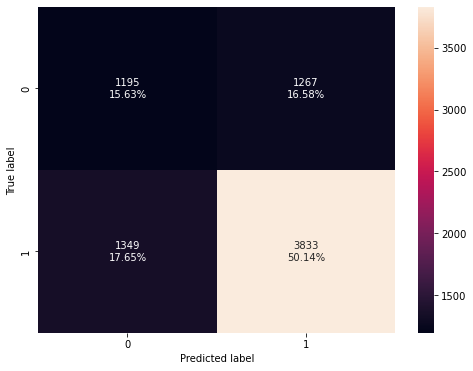

<IPython.core.display.Javascript object>

In [297]:
confusion_matrix_sklearn(dTree, X_test, Y_test)

In [298]:
decision_tree_perf_test = model_performance_classification_sklearn(
    dTree, X_test, Y_test
)
decision_tree_perf_test.T

,0
Accuracy,0.657771
Recall,0.739676
Precision,0.751569
F1,0.745575


<IPython.core.display.Javascript object>

In [299]:
models_test_comp_df["Baseline"] = pd.concat([decision_tree_perf_test.T], axis=1,)

print("testing performance comparison:")
models_test_comp_df

testing performance comparison:


,Baseline
Accuracy,0.657771
Recall,0.739676
Precision,0.751569
F1,0.745575


<IPython.core.display.Javascript object>

### Visualize Decision Tree

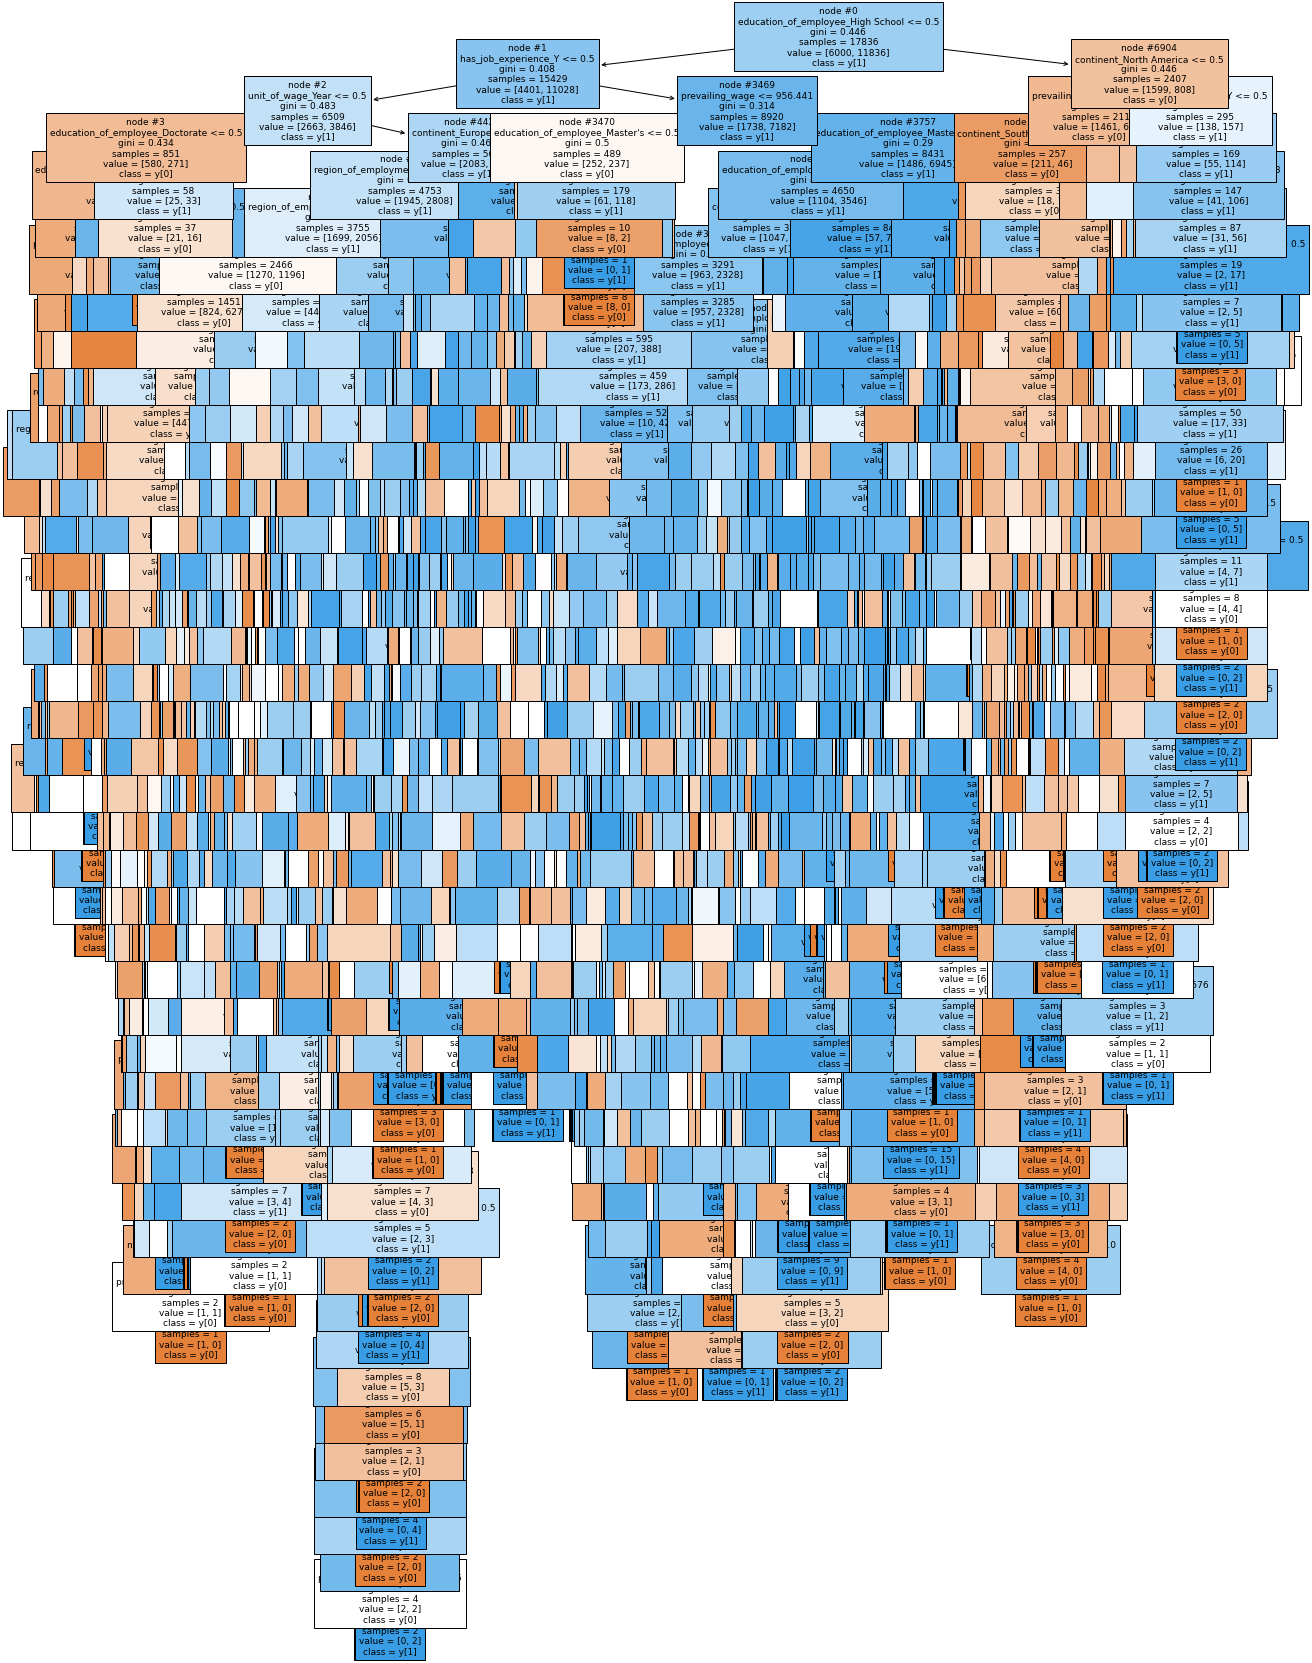

<IPython.core.display.Javascript object>

Wall time: 4min 1s


In [44]:
%%time

feature_names = list(X.columns)
plt.figure(figsize=(20, 30))
tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

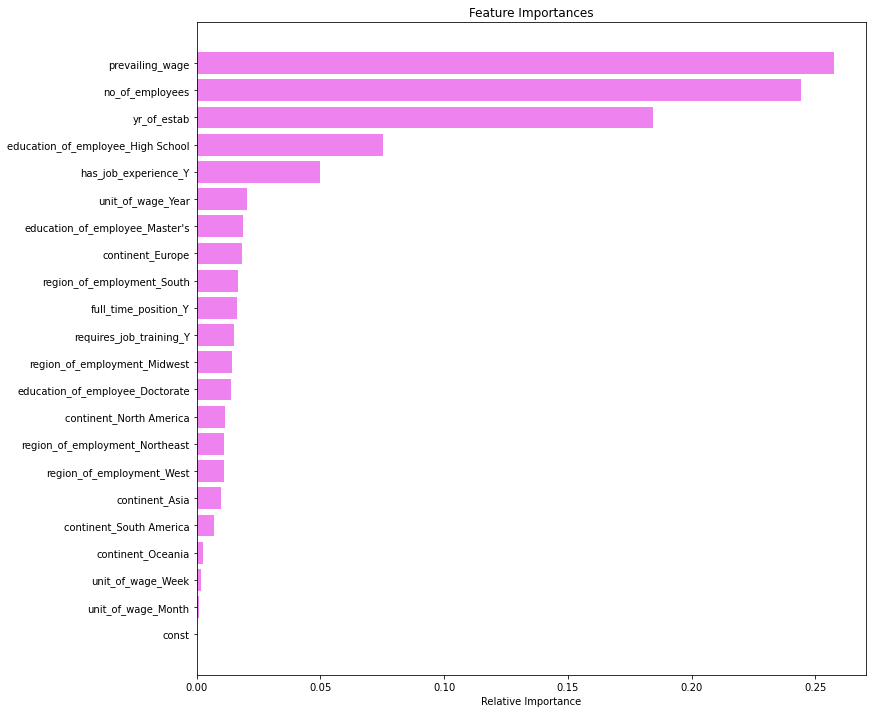

<IPython.core.display.Javascript object>

In [140]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Decision Tree Hyperparameter Tuning

In [300]:
%%time 

# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, Y_train)

Wall time: 4.15 s


DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

<IPython.core.display.Javascript object>

### Check Performance on Training Set

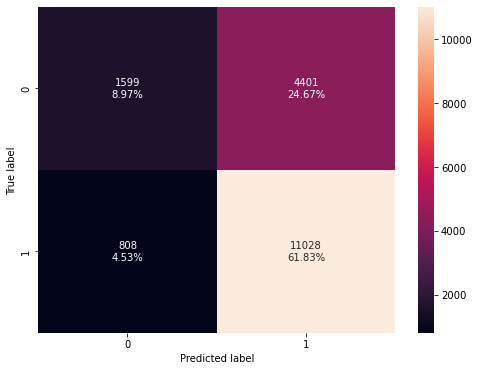

<IPython.core.display.Javascript object>

In [301]:
confusion_matrix_sklearn(estimator, X_train, Y_train)

In [302]:
decision_tree_perf_train = model_performance_classification_sklearn(
    estimator, X_train, Y_train
)
decision_tree_perf_train.T

,0
Accuracy,0.707950
Recall,0.931734
Precision,0.714758
F1,0.808949


<IPython.core.display.Javascript object>

In [303]:
models_train_comp_df["Hyperparameter"] = pd.concat(
    [decision_tree_perf_train.T], axis=1,
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Baseline,Hyperparameter
Accuracy,1.0,0.707950
Recall,1.0,0.931734
Precision,1.0,0.714758
F1,1.0,0.808949


<IPython.core.display.Javascript object>

### Check Performance on Test Set

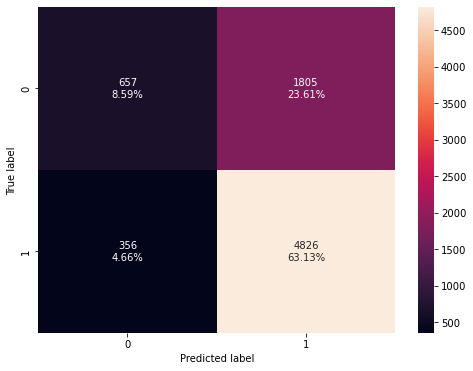

<IPython.core.display.Javascript object>

In [304]:
confusion_matrix_sklearn(estimator, X_test, Y_test)

In [305]:
decision_tree_perf_test = model_performance_classification_sklearn(
    estimator, X_test, Y_test
)
decision_tree_perf_test.T

,0
Accuracy,0.717295
Recall,0.931301
Precision,0.727794
F1,0.817066


<IPython.core.display.Javascript object>

In [306]:
models_test_comp_df["Hyperparameter"] = pd.concat([decision_tree_perf_test.T], axis=1,)

print("testing performance comparison:")
models_test_comp_df

testing performance comparison:


,Baseline,Hyperparameter
Accuracy,0.657771,0.717295
Recall,0.739676,0.931301
Precision,0.751569,0.727794
F1,0.745575,0.817066


<IPython.core.display.Javascript object>

### Visualize Decision Tree

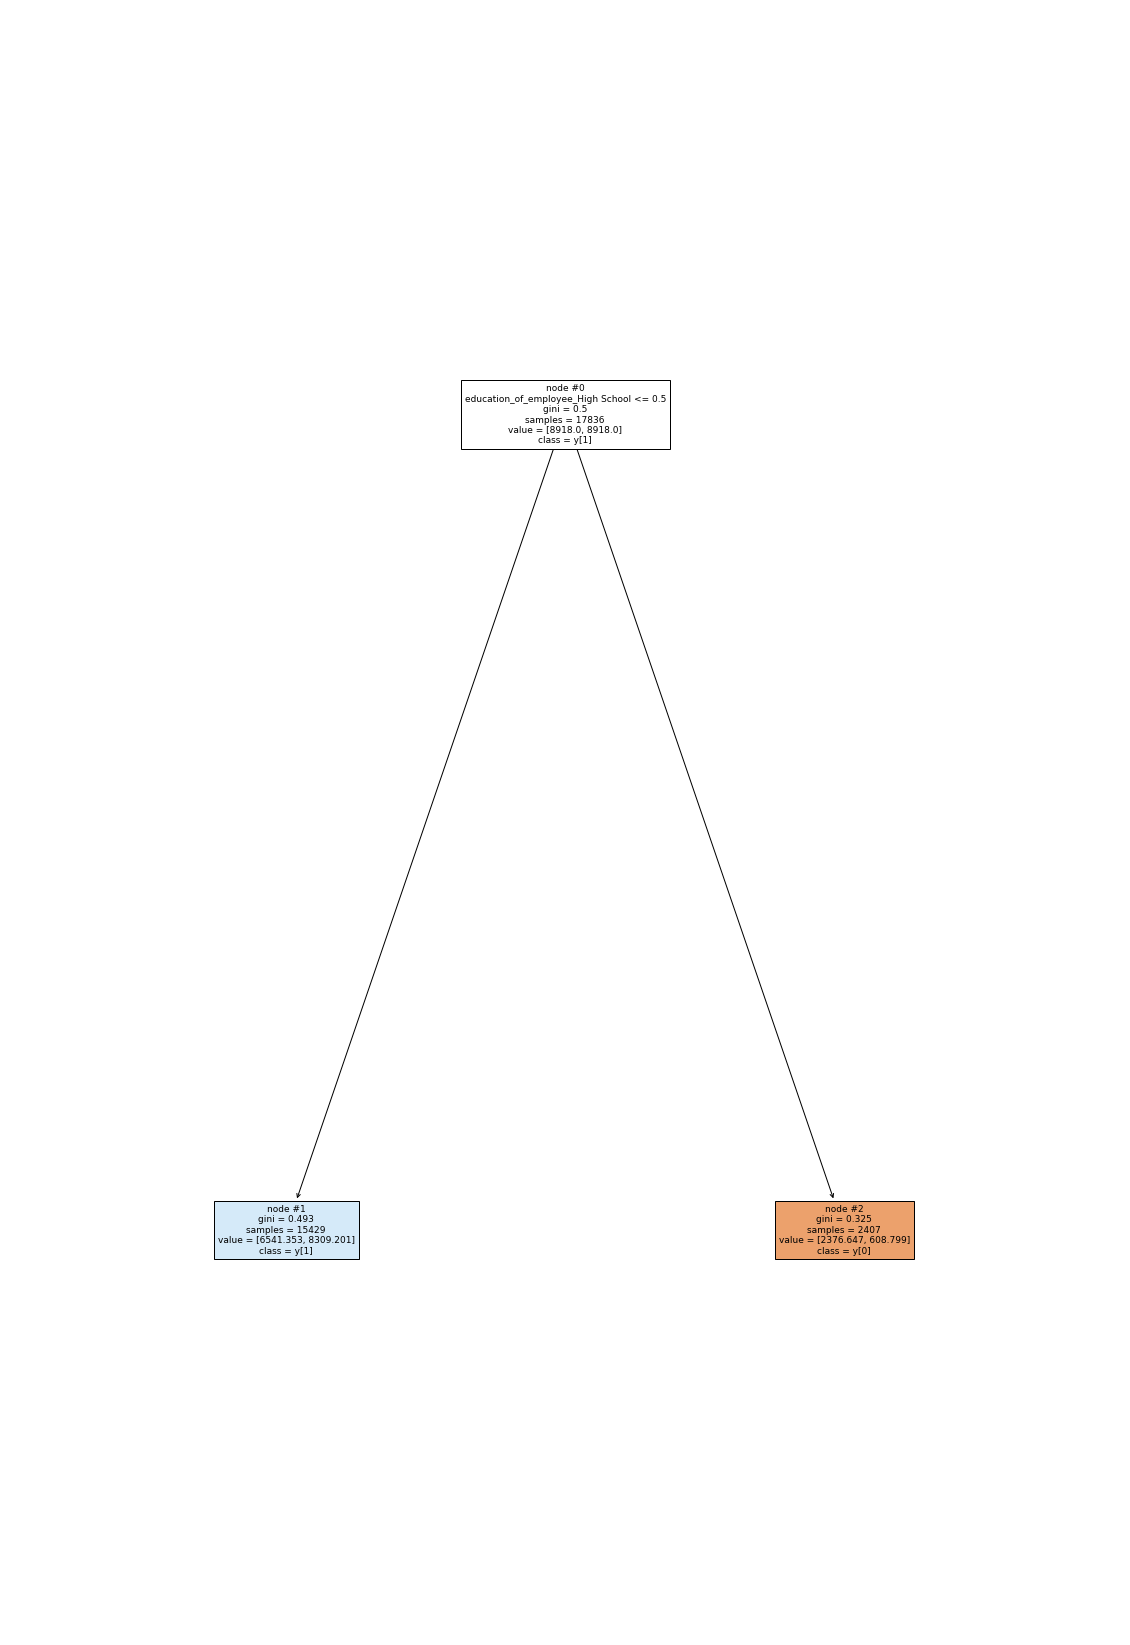

Wall time: 211 ms


<IPython.core.display.Javascript object>

In [148]:
%%time

feature_names = list(X.columns)
plt.figure(figsize=(20, 30))
tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

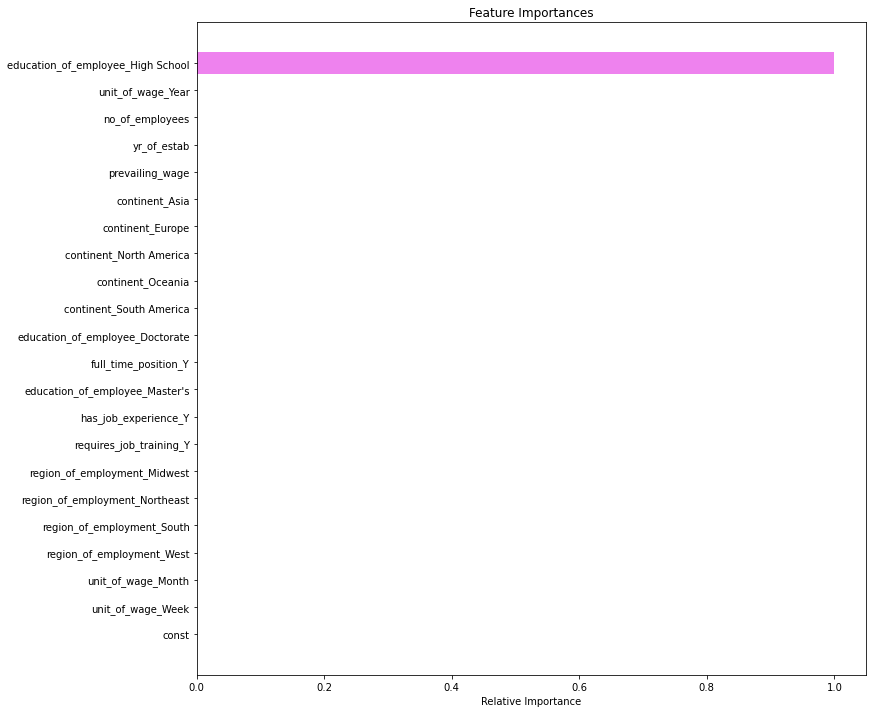

<IPython.core.display.Javascript object>

In [123]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Model Performance Comparison and Conclusions

In [307]:
print("Train and test performance comparison for the decision tree:")

print("Train performance:")
# print(models_train_comp_df)
display(models_train_comp_df)

print("\n\nTest performance:")
# print(models_test_comp_df)
display(models_test_comp_df)

Train and test performance comparison for the decision tree:
Train performance:


,Baseline,Hyperparameter
Accuracy,1.0,0.707950
Recall,1.0,0.931734
Precision,1.0,0.714758
F1,1.0,0.808949




Test performance:


,Baseline,Hyperparameter
Accuracy,0.657771,0.717295
Recall,0.739676,0.931301
Precision,0.751569,0.727794
F1,0.745575,0.817066


<IPython.core.display.Javascript object>

### Observations 
* There is a great difference between all the scores for train and test
* The recall and precision scores are high in train which points to overfitting
* Baseline results for the train data are all 1.0 which is expected 
* For the test data, the results for baseline and hyperparameter are far apart except for Precision 
* Not an ideal model

In [18]:
# Making backup copy of dataframe

# models_train_comp_df.to_csv("C:/Users/David/temp/models_train_comp_df.csv", index=False)
# models_test_comp_df.to_csv("C:/Users/David/temp/models_test_comp_df.csv", index=False)


# Read command if needed
models_train_comp_df = pd.read_csv("C:/Users/David/temp/models_train_comp_df.csv")
models_test_comp_df = pd.read_csv("C:/Users/David/temp/models_test_comp_df.csv")

<IPython.core.display.Javascript object>

## Bagging Model Building and Hyperparameter Tuning

In [42]:
# DataFrame to hold results of model performance

bagging_models_train_comp_df = pd.DataFrame()
bagging_models_test_comp_df = pd.DataFrame()

<IPython.core.display.Javascript object>

### Bagging Classifier

In [43]:
# base_estimator for bagging classifier is a decision tree by default
bagging_estimator = BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train, Y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [44]:
%%time

# Using defined function to get accuracy, recall and precision on train and test set

bagging_estimator_score = get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9847499439336174
Accuracy on test set : 	 0.6983254840397698

Recall on training set :  0.9858060155457925
Recall on test set :  0.77306059436511

Precision on training set :  0.9911654774040095
Precision on test set :  0.7799844236760125
Wall time: 256 ms


<IPython.core.display.Javascript object>

### Check Performance on Training Set

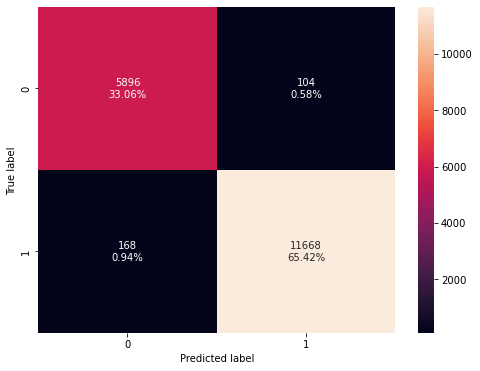

<IPython.core.display.Javascript object>

In [45]:
confusion_matrix_sklearn(bagging_estimator, X_train, Y_train)

In [46]:
decision_tree_perf_train = model_performance_classification_sklearn(
    bagging_estimator, X_train, Y_train
)
decision_tree_perf_train.T

,0
Accuracy,0.984750
Recall,0.985806
Precision,0.991165
F1,0.988478


<IPython.core.display.Javascript object>

In [47]:
bagging_models_train_comp_df["Baseline"] = pd.concat(
    [decision_tree_perf_train.T], axis=1,
)

print("Training performance comparison:")
bagging_models_train_comp_df

Training performance comparison:


,Baseline
Accuracy,0.984750
Recall,0.985806
Precision,0.991165
F1,0.988478


<IPython.core.display.Javascript object>

### Check Performance on Test Set

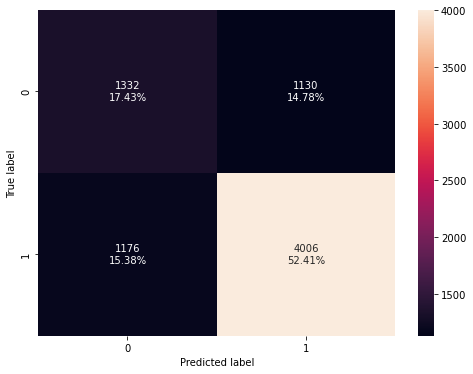

<IPython.core.display.Javascript object>

In [48]:
confusion_matrix_sklearn(bagging_estimator, X_test, Y_test)

In [49]:
decision_tree_perf_test = model_performance_classification_sklearn(
    bagging_estimator, X_test, Y_test
)
decision_tree_perf_test.T

,0
Accuracy,0.698325
Recall,0.773061
Precision,0.779984
F1,0.776507


<IPython.core.display.Javascript object>

In [51]:
bagging_models_test_comp_df["Baseline"] = pd.concat(
    [decision_tree_perf_train.T], axis=1,
)

print("Testing performance comparison:")
bagging_models_test_comp_df

Testing performance comparison:


,Baseline
Accuracy,0.984750
Recall,0.985806
Precision,0.991165
F1,0.988478


<IPython.core.display.Javascript object>

### Bagging Classifier Hyperparameter Tuning

In [52]:
%%time

# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, Y_train)

Wall time: 3min 1s


BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=110,
                  random_state=1)

<IPython.core.display.Javascript object>

In [53]:
%%time

bagging_estimator_score = get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9943933617403005
Accuracy on test set : 	 0.7344322344322345

Recall on training set :  0.9995775599864819
Recall on test set :  0.8884600540331918

Precision on training set :  0.9920342109676338
Precision on test set :  0.7602377807133421
Wall time: 2.03 s


<IPython.core.display.Javascript object>

### Check Performance on Training Set

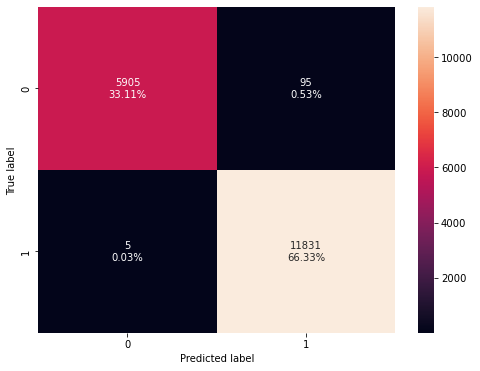

<IPython.core.display.Javascript object>

In [54]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, Y_train)

In [55]:
decision_tree_perf_train = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, Y_train
)
decision_tree_perf_train.T

,0
Accuracy,0.994393
Recall,0.999578
Precision,0.992034
F1,0.995792


<IPython.core.display.Javascript object>

In [56]:
bagging_models_train_comp_df["Hyperparameter"] = pd.concat(
    [decision_tree_perf_train.T], axis=1,
)

print("Training performance comparison:")
bagging_models_train_comp_df

Training performance comparison:


,Baseline,Hyperparameter
Accuracy,0.984750,0.994393
Recall,0.985806,0.999578
Precision,0.991165,0.992034
F1,0.988478,0.995792


<IPython.core.display.Javascript object>

### Check Performance on Test Set

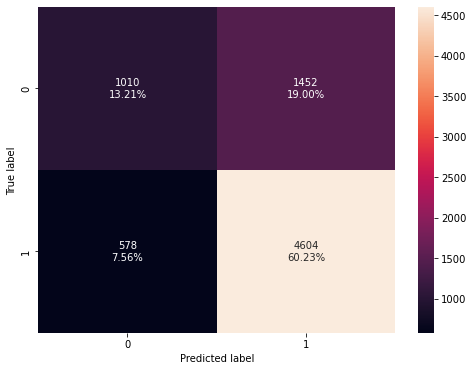

<IPython.core.display.Javascript object>

In [57]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, Y_test)

In [58]:
decision_tree_perf_test = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, Y_test
)
decision_tree_perf_test.T

,0
Accuracy,0.734432
Recall,0.888460
Precision,0.760238
F1,0.819363


<IPython.core.display.Javascript object>

In [59]:
bagging_models_test_comp_df["Hyperparameter"] = pd.concat(
    [decision_tree_perf_train.T], axis=1,
)

print("Training performance comparison:")
bagging_models_test_comp_df

Training performance comparison:


,Baseline,Hyperparameter
Accuracy,0.984750,0.994393
Recall,0.985806,0.999578
Precision,0.991165,0.992034
F1,0.988478,0.995792


<IPython.core.display.Javascript object>

### Model Performance Comparison and Conclusions

In [60]:
print("Train and test performance comparison for the bagging model:")

print("Train performance:")
display(bagging_models_train_comp_df)

print("\n\nTest performance:")
display(bagging_models_test_comp_df)

Train and test performance comparison for the bagging model:
Train performance:


,Baseline,Hyperparameter
Accuracy,0.984750,0.994393
Recall,0.985806,0.999578
Precision,0.991165,0.992034
F1,0.988478,0.995792




Test performance:


,Baseline,Hyperparameter
Accuracy,0.984750,0.994393
Recall,0.985806,0.999578
Precision,0.991165,0.992034
F1,0.988478,0.995792


<IPython.core.display.Javascript object>

### Observations 
* There is no difference between the train and test scores for all scores for both baseline and hyperparameter
* It appears the hyperparameter tuning did not have much effect 
* All the scores are around 98% which points to overfitting
* Not an ideal model

In [19]:
# Making backup copy of dataframe

# bagging_models_train_comp_df.to_csv("C:/Users/David/temp/bagging_models_train_comp_df.csv", index=False)
# bagging_models_test_comp_df.to_csv("C:/Users/David/temp/bagging_models_test_comp_dff.csv", index=False)


# Read command if needed
bagging_models_train_comp_df = pd.read_csv(
    "C:/Users/David/temp/bagging_models_train_comp_df.csv"
)
bagging_models_test_comp_df = pd.read_csv(
    "C:/Users/David/temp/bagging_models_test_comp_dff.csv"
)

<IPython.core.display.Javascript object>

## Random Forest Model Building and Hyperparameter Tuning

In [61]:
# DataFrame to hold results of model performance

ranforst_models_train_comp_df = pd.DataFrame()
ranforst_models_test_comp_df = pd.DataFrame()

<IPython.core.display.Javascript object>

### Random Forest 

In [62]:
# Train the random forest
rf_estimator = RandomForestClassifier(random_state=1, class_weight="balanced")
rf_estimator.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

In [63]:
%%time

# Using defined function to get accuracy, recall and precision on train and test set

rf_estimator_score = get_metrics_score(rf_estimator)

Accuracy on training set :  0.999943933617403
Accuracy on test set : 	 0.7294610151753009

Recall on training set :  1.0
Recall on test set :  0.8461983790042454

Precision on training set :  0.9999155191349159
Precision on test set :  0.7752828854314003
Wall time: 1.42 s


<IPython.core.display.Javascript object>

### Check Performance on Training Set

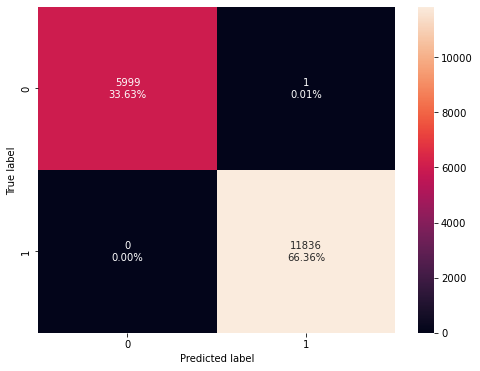

<IPython.core.display.Javascript object>

In [64]:
confusion_matrix_sklearn(rf_estimator, X_train, Y_train)

In [65]:
decision_tree_perf_train = model_performance_classification_sklearn(
    rf_estimator, X_train, Y_train
)
decision_tree_perf_train.T

,0
Accuracy,0.999944
Recall,1.000000
Precision,0.999916
F1,0.999958


<IPython.core.display.Javascript object>

In [66]:
ranforst_models_train_comp_df["Baseline"] = pd.concat(
    [decision_tree_perf_train.T], axis=1,
)

print("Training performance comparison:")
ranforst_models_train_comp_df

Training performance comparison:


,Baseline
Accuracy,0.999944
Recall,1.000000
Precision,0.999916
F1,0.999958


<IPython.core.display.Javascript object>

### Check Performance on Test Set

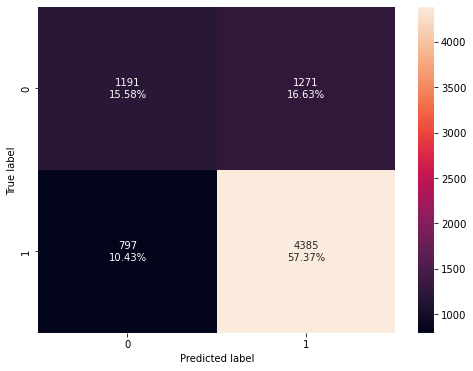

<IPython.core.display.Javascript object>

In [67]:
confusion_matrix_sklearn(rf_estimator, X_test, Y_test)

In [68]:
decision_tree_perf_test = model_performance_classification_sklearn(
    rf_estimator, X_test, Y_test
)
decision_tree_perf_test.T

,0
Accuracy,0.729461
Recall,0.846198
Precision,0.775283
F1,0.809190


<IPython.core.display.Javascript object>

In [69]:
ranforst_models_test_comp_df["Baseline"] = pd.concat(
    [decision_tree_perf_train.T], axis=1,
)

print("Training performance comparison:")
ranforst_models_test_comp_df

Training performance comparison:


,Baseline
Accuracy,0.999944
Recall,1.000000
Precision,0.999916
F1,0.999958


<IPython.core.display.Javascript object>

### Random Forest Hyperparameter Tuning

In [70]:
%%time

# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer,cv=5, n_jobs = -1)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, Y_train)

Wall time: 8.05 s


RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=20, oob_score=True, random_state=1)

<IPython.core.display.Javascript object>

### Check Performance on Training Set

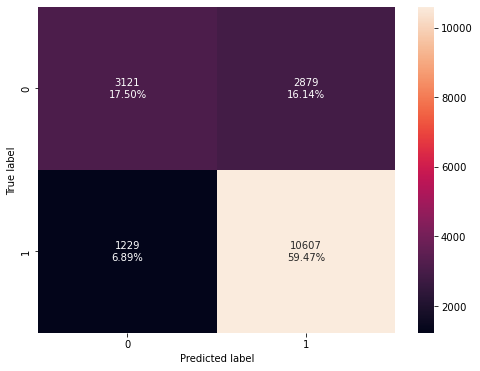

<IPython.core.display.Javascript object>

In [71]:
confusion_matrix_sklearn(rf_tuned, X_train, Y_train)

In [72]:
decision_tree_perf_train = model_performance_classification_sklearn(
    rf_tuned, X_train, Y_train
)
decision_tree_perf_train.T

,0
Accuracy,0.769679
Recall,0.896164
Precision,0.786519
F1,0.837770


<IPython.core.display.Javascript object>

In [73]:
ranforst_models_train_comp_df["Hyperparameter"] = pd.concat(
    [decision_tree_perf_train.T], axis=1,
)

print("Training performance comparison:")
ranforst_models_train_comp_df

Training performance comparison:


,Baseline,Hyperparameter
Accuracy,0.999944,0.769679
Recall,1.000000,0.896164
Precision,0.999916,0.786519
F1,0.999958,0.837770


<IPython.core.display.Javascript object>

### Check Performance on Test Set

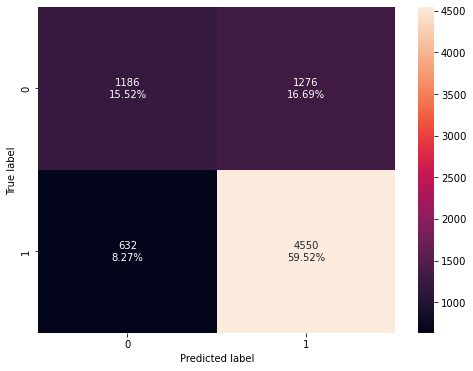

<IPython.core.display.Javascript object>

In [74]:
confusion_matrix_sklearn(rf_tuned, X_test, Y_test)

In [75]:
decision_tree_perf_test = model_performance_classification_sklearn(
    rf_tuned, X_test, Y_test
)
decision_tree_perf_test.T

,0
Accuracy,0.750392
Recall,0.878039
Precision,0.780982
F1,0.826672


<IPython.core.display.Javascript object>

In [76]:
ranforst_models_test_comp_df["Hyperparameter"] = pd.concat(
    [decision_tree_perf_train.T], axis=1,
)

print("Test performance comparison:")
ranforst_models_test_comp_df

Test performance comparison:


,Baseline,Hyperparameter
Accuracy,0.999944,0.769679
Recall,1.000000,0.896164
Precision,0.999916,0.786519
F1,0.999958,0.837770


<IPython.core.display.Javascript object>

### Model Performance Comparison and Conclusions

In [77]:
print("Train and test performance comparison for the random Forest:")

print("Train performance:")
display(ranforst_models_train_comp_df)

print("\n\nTest performance:")
display(ranforst_models_test_comp_df)


Train and test performance comparison for the random Forest:
Train performance:


,Baseline,Hyperparameter
Accuracy,0.999944,0.769679
Recall,1.000000,0.896164
Precision,0.999916,0.786519
F1,0.999958,0.837770




Test performance:


,Baseline,Hyperparameter
Accuracy,0.999944,0.769679
Recall,1.000000,0.896164
Precision,0.999916,0.786519
F1,0.999958,0.837770


<IPython.core.display.Javascript object>

### Observations
* here is no difference between the train and test scores for all scores for both baseline and hyperparameter
* The F1 score is good for the hyperparameter model
* It appears the hyperparameter tuning did not have much effect 
* However, there is overfitting on the recall and precision numbers
* Possible model to consider -- need to review the other models 

In [20]:
# Making backup copy of dataframe

# ranforst_models_train_comp_df.to_csv(
#    "C:/Users/David/temp/ranforest_models_train_comp_df.csv", index=False
# )
# ranforst_models_test_comp_df.to_csv(
#    "C:/Users/David/temp/ranforest_models_test_comp_dff.csv", index=False
#)


# Read command if needed
ranforst_models_train_comp_df = pd.read_csv("C:/Users/David/temp/ranforest_models_train_comp_df.csv")
ranforst_models_test_comp_df = pd.read_csv("C:/Users/David/temp/ranforest_models_test_comp_dff.csv")


<IPython.core.display.Javascript object>

## Boosting Model Building and Hyperparameter Tuning

In [207]:
# DataFrame to hold results of model performance

adaboost_models_train_comp_df = pd.DataFrame()
adaboost_models_test_comp_df = pd.DataFrame()

<IPython.core.display.Javascript object>

### AdaBoost Classifier

In [208]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, Y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [209]:
%%time

# Using defined function to get accuracy, recall and precision on train and test set

abc_score = get_metrics_score(abc)

Accuracy on training set :  0.7373289975330791
Accuracy on test set : 	 0.7375719518576661

Recall on training set :  0.8866171003717472
Recall on test set :  0.8855654187572366

Precision on training set :  0.7584013875840139
Precision on test set :  0.7645784738420527
Wall time: 543 ms


<IPython.core.display.Javascript object>

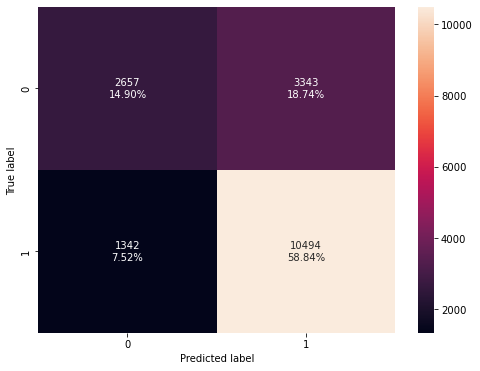

<IPython.core.display.Javascript object>

In [210]:
confusion_matrix_sklearn(abc, X_train, Y_train)

In [211]:
decision_tree_perf_train = model_performance_classification_sklearn(
    abc, X_train, Y_train
)
decision_tree_perf_train.T

,0
Accuracy,0.737329
Recall,0.886617
Precision,0.758401
F1,0.817513


<IPython.core.display.Javascript object>

In [212]:
adaboost_models_train_comp_df["Baseline"] = pd.concat(
    [decision_tree_perf_train.T], axis=1,
)

print("Training performance comparison:")
adaboost_models_train_comp_df

Training performance comparison:


,Baseline
Accuracy,0.737329
Recall,0.886617
Precision,0.758401
F1,0.817513


<IPython.core.display.Javascript object>

### Check Performance on Test Set

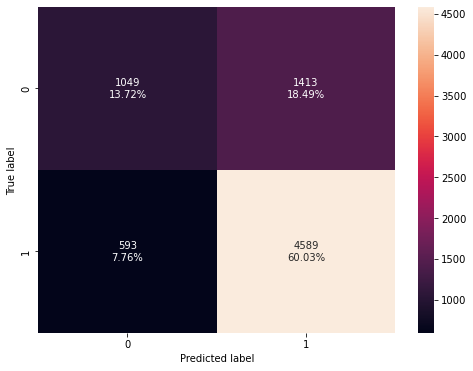

<IPython.core.display.Javascript object>

In [213]:
confusion_matrix_sklearn(abc, X_test, Y_test)

In [214]:
decision_tree_perf_test = model_performance_classification_sklearn(abc, X_test, Y_test)
decision_tree_perf_test.T

,0
Accuracy,0.737572
Recall,0.885565
Precision,0.764578
F1,0.820637


<IPython.core.display.Javascript object>

In [215]:
adaboost_models_test_comp_df["Baseline"] = pd.concat(
    [decision_tree_perf_train.T], axis=1,
)

print("Training performance comparison:")
adaboost_models_test_comp_df

Training performance comparison:


,Baseline
Accuracy,0.737329
Recall,0.886617
Precision,0.758401
F1,0.817513


<IPython.core.display.Javascript object>

### AdaBoost Classifier Hyperparameter Tuning

In [216]:
%%time 

# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, Y_train)

Wall time: 2min 33s


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=90, random_state=1)

<IPython.core.display.Javascript object>

In [217]:
bagging_estimator_score = get_metrics_score(abc_tuned)

Accuracy on training set :  0.7180421619197129
Accuracy on test set : 	 0.7184720041862899

Recall on training set :  0.780162216965191
Recall on test set :  0.7836742570436125

Precision on training set :  0.7918703370208386
Precision on test set :  0.7975255302435192


<IPython.core.display.Javascript object>

### Check Performance on Training Set

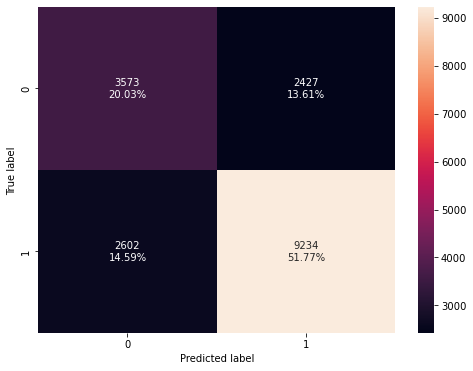

<IPython.core.display.Javascript object>

In [218]:
confusion_matrix_sklearn(abc_tuned, X_train, Y_train)

In [219]:
decision_tree_perf_train = model_performance_classification_sklearn(
    abc_tuned, X_train, Y_train
)
decision_tree_perf_train.T

,0
Accuracy,0.718042
Recall,0.780162
Precision,0.791870
F1,0.785973


<IPython.core.display.Javascript object>

In [220]:
adaboost_models_train_comp_df["Hyperparameter"] = pd.concat(
    [decision_tree_perf_train.T], axis=1,
)

print("Training performance comparison:")
adaboost_models_train_comp_df

Training performance comparison:


,Baseline,Hyperparameter
Accuracy,0.737329,0.718042
Recall,0.886617,0.780162
Precision,0.758401,0.791870
F1,0.817513,0.785973


<IPython.core.display.Javascript object>

### Check Performance on Test Set

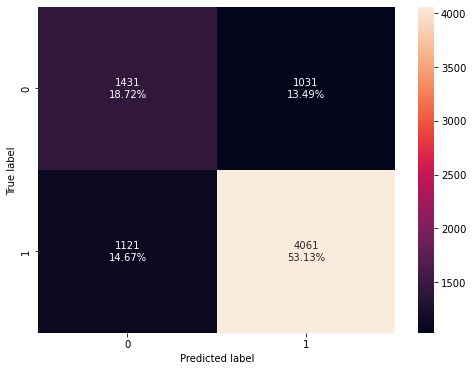

<IPython.core.display.Javascript object>

In [221]:
confusion_matrix_sklearn(abc_tuned, X_test, Y_test)

In [222]:
decision_tree_perf_test = model_performance_classification_sklearn(
    abc_tuned, X_test, Y_test
)
decision_tree_perf_test.T

,0
Accuracy,0.718472
Recall,0.783674
Precision,0.797526
F1,0.790539


<IPython.core.display.Javascript object>

In [223]:
adaboost_models_test_comp_df["Hyperparameter"] = pd.concat(
    [decision_tree_perf_train.T], axis=1,
)

print("Training performance comparison:")
adaboost_models_test_comp_df

Training performance comparison:


,Baseline,Hyperparameter
Accuracy,0.737329,0.718042
Recall,0.886617,0.780162
Precision,0.758401,0.791870
F1,0.817513,0.785973


<IPython.core.display.Javascript object>

### Model Performance Comparison and Conclusions

In [224]:
print("Train and test performance comparison for the AdaBoost Classifier:")

print("Train performance:")
display(adaboost_models_train_comp_df)

print("\n\nTest performance:")
display(adaboost_models_test_comp_df)



Train and test performance comparison for the AdaBoost Classifier:
Train performance:


,Baseline,Hyperparameter
Accuracy,0.737329,0.718042
Recall,0.886617,0.780162
Precision,0.758401,0.791870
F1,0.817513,0.785973




Test performance:


,Baseline,Hyperparameter
Accuracy,0.737329,0.718042
Recall,0.886617,0.780162
Precision,0.758401,0.791870
F1,0.817513,0.785973


<IPython.core.display.Javascript object>

### Observations
* There is no difference between the train and test scores for all scores for both baseline and hyperparameter
* The F1 score is good for the hyperparameter model, but not as strong as the other models
* The recall and precision numbers are good, but lower than the other models
* This model is not overfitting as much as the previous models 
* Possible model to consider

In [21]:
# Making backup copy of dataframe

# adaboost_models_train_comp_df.to_csv(
#    "C:/Users/David/temp/adaboost_models_train_comp_df.csv", index=False
# )
# adaboost_models_test_comp_df.to_csv(
#    "C:/Users/David/temp/adaboost_models_test_comp_dff.csv", index=False
# )


# Read command if needed
adaboost_models_train_comp_df = pd.read_csv(
    "C:/Users/David/temp/adaboost_models_train_comp_df.csv"
)
adaboost_models_test_comp_df = pd.read_csv(
    "C:/Users/David/temp/adaboost_models_test_comp_dff.csv"
)

<IPython.core.display.Javascript object>

## Gradient Boosting Classifier Building and Hyperparameter Tuning

In [226]:
# DataFrame to hold results of model performance

gbm_models_train_comp_df = pd.DataFrame()
gbm_models_test_comp_df = pd.DataFrame()

<IPython.core.display.Javascript object>

### Gradient Boosting Classifier

In [227]:
gbc_init = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)
gbc_init.fit(X_train, Y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

<IPython.core.display.Javascript object>

In [228]:
%%time

# Using defined function to get accuracy, recall and precision on train and test set

gbc_init_score = get_metrics_score(gbc_init)

Accuracy on training set :  0.7560551693204755
Accuracy on test set : 	 0.7511773940345369

Recall on training set :  0.8774923960797567
Recall on test set :  0.8695484368969509

Precision on training set :  0.7816662903589975
Precision on test set :  0.7861130495464062
Wall time: 466 ms


<IPython.core.display.Javascript object>

### Check Performance on Training Set

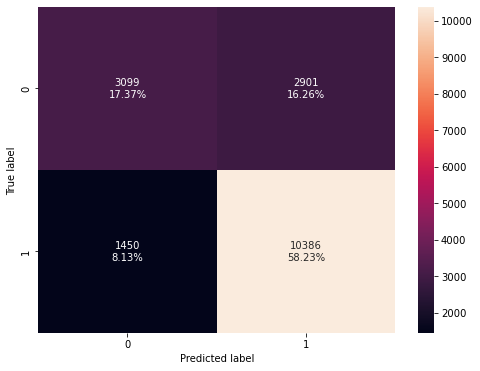

<IPython.core.display.Javascript object>

In [229]:
confusion_matrix_sklearn(gbc_init, X_train, Y_train)

In [230]:
decision_tree_perf_train = model_performance_classification_sklearn(
    gbc_init, X_train, Y_train
)
decision_tree_perf_train.T

,0
Accuracy,0.756055
Recall,0.877492
Precision,0.781666
F1,0.826812


<IPython.core.display.Javascript object>

In [231]:
gbm_models_train_comp_df["Baseline"] = pd.concat([decision_tree_perf_train.T], axis=1,)

print("Training performance comparison:")
gbm_models_train_comp_df

Training performance comparison:


,Baseline
Accuracy,0.756055
Recall,0.877492
Precision,0.781666
F1,0.826812


<IPython.core.display.Javascript object>

### Check Performance on Test Set

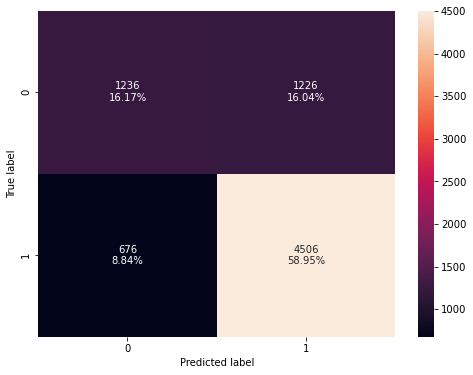

<IPython.core.display.Javascript object>

In [232]:
confusion_matrix_sklearn(gbc_init, X_test, Y_test)

In [233]:
decision_tree_perf_test = model_performance_classification_sklearn(
    gbc_init, X_test, Y_test
)
decision_tree_perf_test.T

,0
Accuracy,0.751177
Recall,0.869548
Precision,0.786113
F1,0.825728


<IPython.core.display.Javascript object>

In [234]:
gbm_models_test_comp_df["Baseline"] = pd.concat([decision_tree_perf_train.T], axis=1,)

print("Training performance comparison:")
gbm_models_test_comp_df

Training performance comparison:


,Baseline
Accuracy,0.756055
Recall,0.877492
Precision,0.781666
F1,0.826812


<IPython.core.display.Javascript object>

### Gradient Boosting Classifier Hyperparameter Tuning

In [235]:
%%time 

# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, Y_train)

Wall time: 4min 10s


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=0.9)

<IPython.core.display.Javascript object>

### Check Performance on Training Set

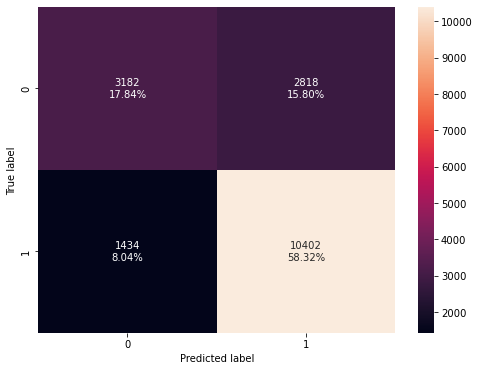

<IPython.core.display.Javascript object>

In [236]:
confusion_matrix_sklearn(gbc_tuned, X_train, Y_train)

In [237]:
decision_tree_perf_train = model_performance_classification_sklearn(
    gbc_tuned, X_train, Y_train
)
decision_tree_perf_train.T

,0
Accuracy,0.761606
Recall,0.878844
Precision,0.786838
F1,0.830300


<IPython.core.display.Javascript object>

In [238]:
gbm_models_train_comp_df["Hyperparameter"] = pd.concat(
    [decision_tree_perf_train.T], axis=1,
)

print("Training performance comparison:")
gbm_models_train_comp_df

Training performance comparison:


,Baseline,Hyperparameter
Accuracy,0.756055,0.761606
Recall,0.877492,0.878844
Precision,0.781666,0.786838
F1,0.826812,0.830300


<IPython.core.display.Javascript object>

### Check Performance on Test Set

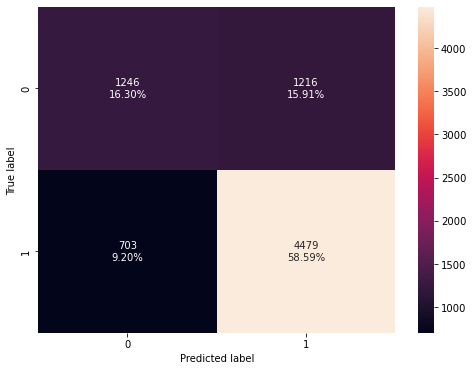

<IPython.core.display.Javascript object>

In [239]:
confusion_matrix_sklearn(gbc_tuned, X_test, Y_test)

In [240]:
decision_tree_perf_test = model_performance_classification_sklearn(
    gbc_tuned, X_test, Y_test
)
decision_tree_perf_test.T

,0
Accuracy,0.748953
Recall,0.864338
Precision,0.786479
F1,0.823573


<IPython.core.display.Javascript object>

In [241]:
gbm_models_test_comp_df["Hyperparameter"] = pd.concat(
    [decision_tree_perf_train.T], axis=1,
)

print("Training performance comparison:")
gbm_models_test_comp_df

Training performance comparison:


,Baseline,Hyperparameter
Accuracy,0.756055,0.761606
Recall,0.877492,0.878844
Precision,0.781666,0.786838
F1,0.826812,0.830300


<IPython.core.display.Javascript object>

### Model Performance Comparison and Conclusions

In [273]:
print("Train and test performance comparison for Gradient Boosting:")

print("Train performance:")
display(gbm_models_train_comp_df)

print("\n\nTest performance:")
display(gbm_models_test_comp_df)



Train and test performance comparison for Gradient Boosting:
Train performance:


,Baseline,Hyperparameter
Accuracy,0.756055,0.761606
Recall,0.877492,0.878844
Precision,0.781666,0.786838
F1,0.826812,0.830300




Test performance:


,Baseline,Hyperparameter
Accuracy,0.756055,0.761606
Recall,0.877492,0.878844
Precision,0.781666,0.786838
F1,0.826812,0.830300


<IPython.core.display.Javascript object>

### Observations
* There is no difference between the train and test scores for all scores for both baseline and hyperparameter
* The F1 score is good for the hyperparameter model
* The recall and precision numbers are good 
* This model is not as overfit as the bagging models 
* Possible model to consider

In [22]:
# Making backup copy of dataframe

# gbm_models_train_comp_df.to_csv(
#    "C:/Users/David/temp/gbm_models_train_comp_df.csv", index=False
# )
# gbm_models_test_comp_df.to_csv(
#    "C:/Users/David/temp/gbm_models_test_comp_dff.csv", index=False
# )


# Read command if needed
gbm_models_train_comp_df = pd.read_csv(
    "C:/Users/David/temp/gbm_models_train_comp_df.csv"
)
gbm_models_test_comp_df = pd.read_csv(
    "C:/Users/David/temp/gbm_models_test_comp_dff.csv"
)

<IPython.core.display.Javascript object>

## XGBoost Classifier Model Building and Hyperparameter Tuning

In [244]:
# DataFrame to hold results of model performance

xgb_models_train_comp_df = pd.DataFrame()
xgb_models_test_comp_df = pd.DataFrame()

<IPython.core.display.Javascript object>

### XGBoost Classifier

In [245]:
xgb_estimator = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_estimator.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

In [246]:
%%time

xgb_estimator_score = get_metrics_score(xgb_estimator)

Accuracy on training set :  0.8319690513568064
Accuracy on test set : 	 0.7369178440607012

Recall on training set :  0.9255660696181143
Recall on test set :  0.8568120416827479

Precision on training set :  0.8381149108713947
Precision on test set :  0.7777193904361535
Wall time: 120 ms


<IPython.core.display.Javascript object>

### Check Performance on Training Set

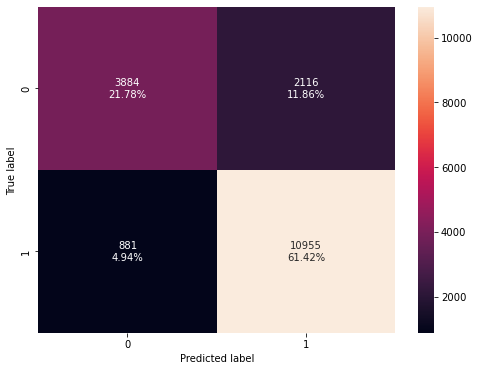

<IPython.core.display.Javascript object>

In [247]:
confusion_matrix_sklearn(xgb_estimator, X_train, Y_train)

In [248]:
decision_tree_perf_train = model_performance_classification_sklearn(
    xgb_estimator, X_train, Y_train
)
decision_tree_perf_train.T

,0
Accuracy,0.831969
Recall,0.925566
Precision,0.838115
F1,0.879672


<IPython.core.display.Javascript object>

In [249]:
xgb_models_train_comp_df["Baseline"] = pd.concat([decision_tree_perf_train.T], axis=1,)

print("Training performance comparison:")
xgb_models_train_comp_df

Training performance comparison:


,Baseline
Accuracy,0.831969
Recall,0.925566
Precision,0.838115
F1,0.879672


<IPython.core.display.Javascript object>

### Check Performance on Test Set

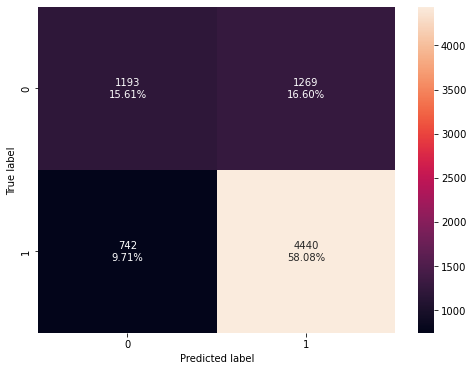

<IPython.core.display.Javascript object>

In [250]:
confusion_matrix_sklearn(xgb_estimator, X_test, Y_test)

In [251]:
decision_tree_perf_test = model_performance_classification_sklearn(
    xgb_estimator, X_test, Y_test
)
decision_tree_perf_test.T

,0
Accuracy,0.736918
Recall,0.856812
Precision,0.777719
F1,0.815352


<IPython.core.display.Javascript object>

In [252]:
xgb_models_test_comp_df["Baseline"] = pd.concat([decision_tree_perf_train.T], axis=1,)

print("Training performance comparison:")
xgb_models_test_comp_df

Training performance comparison:


,Baseline
Accuracy,0.831969
Recall,0.925566
Precision,0.838115
F1,0.879672


<IPython.core.display.Javascript object>

### XGBoost Classifier Hyperparameter Tuning

In [253]:
%%time

# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)


# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, Y_train)

Wall time: 11min 6s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

### Notes 

An 11 minute 6 second run at 100% CPU utilization with 16 virtualized cores at a speed of 3.8 GHz.  Memory and disk utilization remained flat during the run.  This is a CPU bound command.  Pretty heavy duty command.  

In [254]:
%%time

xgb_score = get_metrics_score(xgb_tuned)

Accuracy on training set :  0.7638483965014577
Accuracy on test set : 	 0.7511773940345369

Recall on training set :  0.8790976681311253
Recall on test set :  0.8653029718255499

Precision on training set :  0.7890944941604733
Precision on test set :  0.7883263009845288
Wall time: 107 ms


<IPython.core.display.Javascript object>

### Check Performance on Training Set

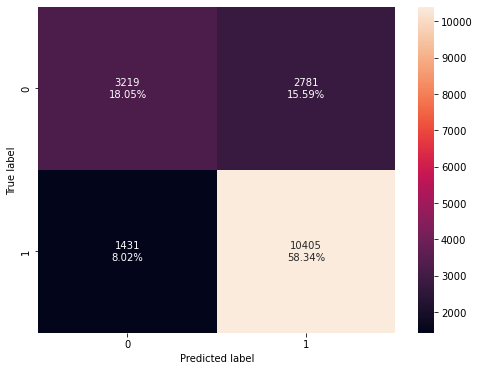

<IPython.core.display.Javascript object>

In [255]:
confusion_matrix_sklearn(xgb_tuned, X_train, Y_train)

In [256]:
decision_tree_perf_train = model_performance_classification_sklearn(
    xgb_tuned, X_train, Y_train
)
decision_tree_perf_train.T

,0
Accuracy,0.763848
Recall,0.879098
Precision,0.789094
F1,0.831668


<IPython.core.display.Javascript object>

In [257]:
xgb_models_train_comp_df["Hyperparameter"] = pd.concat(
    [decision_tree_perf_train.T], axis=1,
)

print("Training performance comparison:")
xgb_models_train_comp_df

Training performance comparison:


,Baseline,Hyperparameter
Accuracy,0.831969,0.763848
Recall,0.925566,0.879098
Precision,0.838115,0.789094
F1,0.879672,0.831668


<IPython.core.display.Javascript object>

### Check Performance on Test Set

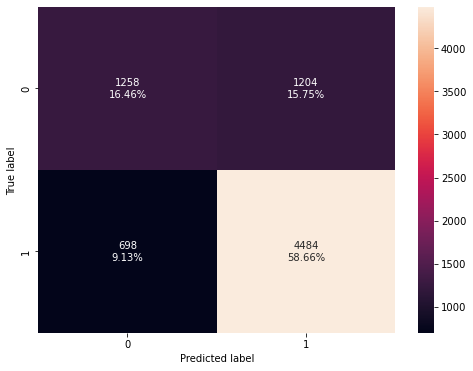

<IPython.core.display.Javascript object>

In [258]:
confusion_matrix_sklearn(xgb_tuned, X_test, Y_test)

In [259]:
decision_tree_perf_test = model_performance_classification_sklearn(
    xgb_tuned, X_test, Y_test
)
decision_tree_perf_test.T

,0
Accuracy,0.751177
Recall,0.865303
Precision,0.788326
F1,0.825023


<IPython.core.display.Javascript object>

In [260]:
xgb_models_test_comp_df["Hyperparameter"] = pd.concat(
    [decision_tree_perf_train.T], axis=1,
)

print("Training performance comparison:")
xgb_models_test_comp_df

Training performance comparison:


,Baseline,Hyperparameter
Accuracy,0.831969,0.763848
Recall,0.925566,0.879098
Precision,0.838115,0.789094
F1,0.879672,0.831668


<IPython.core.display.Javascript object>

### Model Performance Comparison and Conclusions

In [275]:
print("Train and test performance comparison for the XGBoost Classifier:")

print("Train performance:")
display(xgb_models_train_comp_df)

print("\n\nTest performance:")
display(xgb_models_test_comp_df)


Train and test performance comparison for the XGBoost Classifier:
Train performance:


,Baseline,Hyperparameter
Accuracy,0.831969,0.763848
Recall,0.925566,0.879098
Precision,0.838115,0.789094
F1,0.879672,0.831668




Test performance:


,Baseline,Hyperparameter
Accuracy,0.831969,0.763848
Recall,0.925566,0.879098
Precision,0.838115,0.789094
F1,0.879672,0.831668


<IPython.core.display.Javascript object>

### Observations  
* There is no difference between the train and test scores for all scores for both baseline and hyperparameter
* The F1 score is good for the hyperparameter model
* The recall and precision numbers are good, but recall is rather high which points to overfitting
* Possible model to consider


In [23]:
# Making backup copy of dataframe

# xgb_models_train_comp_df.to_csv(
#    "C:/Users/David/temp/xgb_models_train_comp_df.csv", index=False
# )
# xgb_models_test_comp_df.to_csv(
#    "C:/Users/David/temp/xgb_models_test_comp_dff.csv", index=False
# )


# Read command if needed
xgb_models_train_comp_df = pd.read_csv(
    "C:/Users/David/temp/xgb_models_train_comp_df.csv"
)
xgb_models_test_comp_df = pd.read_csv(
    "C:/Users/David/temp/xgb_models_test_comp_dff.csv"
)

<IPython.core.display.Javascript object>

## Stacking Classifier Model Building

In [263]:
# DataFrame to hold results of model performance

stacking_models_train_comp_df = pd.DataFrame()

<IPython.core.display.Javascript object>

### Stacking Classifier

In [264]:
%%time

estimators = [
    ("AdaBoost", abc),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,Y_train)

Wall time: 21.3 s


StackingClassifier(cv=5,
                   estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_sc...
                             

<IPython.core.display.Javascript object>

In [265]:
%%time

stacking_score = get_metrics_score(stacking_estimator)

Accuracy on training set :  0.7655864543619646
Accuracy on test set : 	 0.749345892203035

Recall on training set :  0.8789286921257181
Recall on test set :  0.8612504824392127

Precision on training set :  0.7910425062732872
Precision on test set :  0.7885159010600706
Wall time: 1.34 s


<IPython.core.display.Javascript object>

### Check Performance on Training Set

In [266]:
decision_tree_perf_train = model_performance_classification_sklearn(
    stacking_estimator, X_train, Y_train
)
decision_tree_perf_train.T

,0
Accuracy,0.765586
Recall,0.878929
Precision,0.791043
F1,0.832673


<IPython.core.display.Javascript object>

In [267]:
stacking_models_train_comp_df["Baseline"] = pd.concat(
    [decision_tree_perf_train.T], axis=1,
)

print("Training performance comparison:")
stacking_models_train_comp_df

Training performance comparison:


,Baseline
Accuracy,0.765586
Recall,0.878929
Precision,0.791043
F1,0.832673


<IPython.core.display.Javascript object>

### Check Performance on Test Set

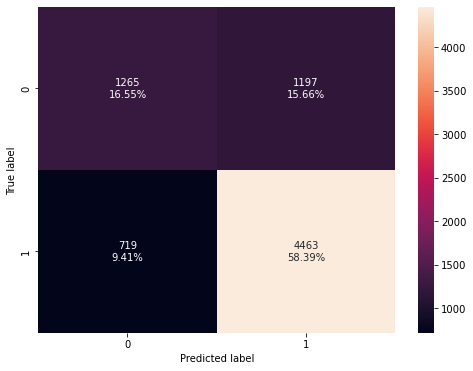

<IPython.core.display.Javascript object>

In [268]:
confusion_matrix_sklearn(stacking_estimator, X_test, Y_test)

In [269]:
decision_tree_perf_test = model_performance_classification_sklearn(
    stacking_estimator, X_test, Y_test
)
decision_tree_perf_test.T

,0
Accuracy,0.749346
Recall,0.861250
Precision,0.788516
F1,0.823280


<IPython.core.display.Javascript object>

In [270]:
stacking_models_test_comp_df["Baseline"] = pd.concat(
    [decision_tree_perf_train.T], axis=1,
)

print("Training performance comparison:")
stacking_models_test_comp_df

Training performance comparison:


,Baseline
Accuracy,0.765586
Recall,0.878929
Precision,0.791043
F1,0.832673


<IPython.core.display.Javascript object>

### Model Performance Comparison and Conclusions

### Observations 
* The F1 score is good for the hyperparameter model
* The recall and precision numbers are good, but other models have better scores
* Might want to rerun this using different bagging and boosting models 

In [24]:
# Making backup copy of dataframe

# stacking_models_train_comp_df.to_csv(
#    "C:/Users/David/temp/stacking_models_train_comp_df.csv", index=False
# )


# Read command if needed
stacking_models_train_comp_df = pd.read_csv("C:/Users/David/temp/stacking_models_train_comp_df.csv")


<IPython.core.display.Javascript object>

## Overall Model Performance Comparison and Conclusions

In [25]:
# Printing the training and test results side by side as it makes for an easier read

space = "\xa0" * 10

result_df = models_train_comp_df.subtract(models_test_comp_df)
df1_styler = models_train_comp_df.style.set_table_attributes(
    "style='display:inline'"
).set_caption("Decision Tree Train ")
df2_styler = models_test_comp_df.style.set_table_attributes(
    "style='display:inline'"
).set_caption("Decision Tree Test")
df3_styler = result_df.style.set_table_attributes("style='display:inline'").set_caption(
    "Train and Test Difference"
)
display_html(
    df1_styler._repr_html_()
    + space
    + df2_styler._repr_html_()
    + space
    + df3_styler._repr_html_(),
    raw=True,
)
print("Key: 0 = Accuracy, 1 = Recall, 2 = Precision, 3 = F1")
print("\n")

result_df = bagging_models_train_comp_df.subtract(bagging_models_test_comp_df)
df1_styler = bagging_models_train_comp_df.style.set_table_attributes(
    "style='display:inline'"
).set_caption("Bagging Classifier Train ")
df2_styler = bagging_models_test_comp_df.style.set_table_attributes(
    "style='display:inline'"
).set_caption("Bagging Classifer Test")
df3_styler = result_df.style.set_table_attributes("style='display:inline'").set_caption(
    "Train and Test Difference"
)
display_html(
    df1_styler._repr_html_()
    + space
    + df2_styler._repr_html_()
    + space
    + df3_styler._repr_html_(),
    raw=True,
)
print("Key: 0 = Accuracy, 1 = Recall, 2 = Precision, 3 = F1")
print("\n")

result_df = ranforst_models_train_comp_df.subtract(ranforst_models_test_comp_df)
df1_styler = ranforst_models_train_comp_df.style.set_table_attributes(
    "style='display:inline'"
).set_caption("Random Forest Train")
df2_styler = ranforst_models_test_comp_df.style.set_table_attributes(
    "style='display:inline'"
).set_caption("Random Forest Test")
df3_styler = result_df.style.set_table_attributes("style='display:inline'").set_caption(
    "Train and Test Difference"
)
display_html(
    df1_styler._repr_html_()
    + space
    + df2_styler._repr_html_()
    + space
    + df3_styler._repr_html_(),
    raw=True,
)
print("Key: 0 = Accuracy, 1 = Recall, 2 = Precision, 3 = F1")
print("\n")

result_df = adaboost_models_train_comp_df.subtract(adaboost_models_test_comp_df)
df1_styler = adaboost_models_train_comp_df.style.set_table_attributes(
    "style='display:inline'"
).set_caption("AdaBoost Classifer Train")
df2_styler = adaboost_models_test_comp_df.style.set_table_attributes(
    "style='display:inline'"
).set_caption("AdaBoost Classifier Test")
df3_styler = result_df.style.set_table_attributes("style='display:inline'").set_caption(
    "Train and Test Difference"
)
display_html(
    df1_styler._repr_html_()
    + space
    + df2_styler._repr_html_()
    + space
    + df3_styler._repr_html_(),
    raw=True,
)
print("Key: 0 = Accuracy, 1 = Recall, 2 = Precision, 3 = F1")
print("\n")

result_df = gbm_models_train_comp_df.subtract(gbm_models_test_comp_df)
df1_styler = gbm_models_train_comp_df.style.set_table_attributes(
    "style='display:inline'"
).set_caption("Gradient Boosting Classifier Train")
df2_styler = gbm_models_test_comp_df.style.set_table_attributes(
    "style='display:inline'"
).set_caption("Gradient Boosting Classifier Test")
df3_styler = result_df.style.set_table_attributes("style='display:inline'").set_caption(
    "Train and Test Difference"
)
display_html(
    df1_styler._repr_html_()
    + space
    + df2_styler._repr_html_()
    + space
    + df3_styler._repr_html_(),
    raw=True,
)
print("Key: 0 = Accuracy, 1 = Recall, 2 = Precision, 3 = F1")
print("\n")

result_df = xgb_models_train_comp_df.subtract(xgb_models_test_comp_df)
df1_styler = xgb_models_train_comp_df.style.set_table_attributes(
    "style='display:inline'"
).set_caption("XGBoost Classifier Train")
df2_styler = xgb_models_test_comp_df.style.set_table_attributes(
    "style='display:inline'"
).set_caption("XGBoost Classifier Test")
df3_styler = result_df.style.set_table_attributes("style='display:inline'").set_caption(
    "Train and Test Difference"
)
display_html(
    df1_styler._repr_html_()
    + space
    + df2_styler._repr_html_()
    + space
    + df3_styler._repr_html_(),
    raw=True,
)
print("Key: 0 = Accuracy, 1 = Recall, 2 = Precision, 3 = F1")
print("\n")

print("Stacking Classifier",)
display(stacking_models_train_comp_df)
print("Key: 0 = Accuracy, 1 = Recall, 2 = Precision, 3 = F1")

del df1_styler  # free memory
del df2_styler
del df3_styler
del result_df

,Baseline,Hyperparameter
0,1.000000,0.707950
1,1.000000,0.931734
2,1.000000,0.714758
3,1.000000,0.808949
,Baseline,Hyperparameter
0,0.657771,0.717295
1,0.739676,0.931301
2,0.751569,0.727794
3,0.745575,0.817066
,Baseline,Hyperparameter


Key: 0 = Accuracy, 1 = Recall, 2 = Precision, 3 = F1




,Baseline,Hyperparameter
0,0.984750,0.994393
1,0.985806,0.999578
2,0.991165,0.992034
3,0.988478,0.995792
,Baseline,Hyperparameter
0,0.984750,0.994393
1,0.985806,0.999578
2,0.991165,0.992034
3,0.988478,0.995792
,Baseline,Hyperparameter


Key: 0 = Accuracy, 1 = Recall, 2 = Precision, 3 = F1




,Baseline,Hyperparameter
0,0.999944,0.769679
1,1.000000,0.896164
2,0.999916,0.786519
3,0.999958,0.837770
,Baseline,Hyperparameter
0,0.999944,0.769679
1,1.000000,0.896164
2,0.999916,0.786519
3,0.999958,0.837770
,Baseline,Hyperparameter


Key: 0 = Accuracy, 1 = Recall, 2 = Precision, 3 = F1




,Baseline,Hyperparameter
0,0.737329,0.718042
1,0.886617,0.780162
2,0.758401,0.791870
3,0.817513,0.785973
,Baseline,Hyperparameter
0,0.737329,0.718042
1,0.886617,0.780162
2,0.758401,0.791870
3,0.817513,0.785973
,Baseline,Hyperparameter


Key: 0 = Accuracy, 1 = Recall, 2 = Precision, 3 = F1




,Baseline,Hyperparameter
0,0.756055,0.761606
1,0.877492,0.878844
2,0.781666,0.786838
3,0.826812,0.830300
,Baseline,Hyperparameter
0,0.756055,0.761606
1,0.877492,0.878844
2,0.781666,0.786838
3,0.826812,0.830300
,Baseline,Hyperparameter


Key: 0 = Accuracy, 1 = Recall, 2 = Precision, 3 = F1




,Baseline,Hyperparameter
0,0.831969,0.763848
1,0.925566,0.879098
2,0.838115,0.789094
3,0.879672,0.831668
,Baseline,Hyperparameter
0,0.831969,0.763848
1,0.925566,0.879098
2,0.838115,0.789094
3,0.879672,0.831668
,Baseline,Hyperparameter


Key: 0 = Accuracy, 1 = Recall, 2 = Precision, 3 = F1


Stacking Classifier


,Baseline
0,0.765586
1,0.878929
2,0.791043
3,0.832673


Key: 0 = Accuracy, 1 = Recall, 2 = Precision, 3 = F1


<IPython.core.display.Javascript object>

## Model Selection 

Goal: Find the "goldilocks" model.  That is the model that does not overfit nor underfit.  The model is just right.  

1. Decision Tree 
    * There is a great difference between all the scores for train and test 
    * The recall and precision scores are high in train which points to overfitting 
    * Not an ideal model 
2. Bagging Classifier 
    * There is no difference between the train and test scores for all scores for both baseline and hyperparameter 
    * All the scores are around 98% which points to overfitting 
    * Not an ideal model 
3. Random Forest
    * There is no difference between the train and test scores for all scores for both baseline and hyperparameter 
    * The F1 score is good for the hyperparameter model 
    * However, there is overfitting on the recall and precision numbers 
    * Possible model to consider 
4. AdaBoost Classifer 
    * There is no difference between the train and test scores for all scores for both baseline and hyperparameter 
    * The F1 score is good for the hyperparameter model, but not as strong as the other models 
    * The recall and precision numbers are good, but lower than the other models 
    * Possible model to consider  
5. Gradient Boosting Classifier 
    * There is no difference between the train and test scores for all scores for both baseline and hyperparameter  
    * The F1 score is good for the hyperparameter model 
    * The recall and precision numbers are good 
    * Possible model to consider   
6. XGBoost Classifier 
    * There is no difference between the train and test scores for all scores for both baseline and hyperparameter  
    * The F1 score is good for the hyperparameter model 
    * The recall and precision numbers are good, but recall is rather high which points to overfitting 
    * Possible model to consider   
7. Stacking Classifier 
    * The F1 score is good for the hyperparameter model 
    * The recall and precision numbers are good, but other models have better scores   
    
Selection 
* Given the need for a "goldilocks" model, the Gradient Boosting Classifier is the model to use.  It has a high F1 score while the recall and precision numbers are high enough to avoid under fitting, but are low enough to avoid over fitting.  

The Random Forest, AdaBoost Classifer, and XGBoost Classifier models are good with high F1 scores, but the recall and precision numbers are either too high or too low.  

## Important features of the final model

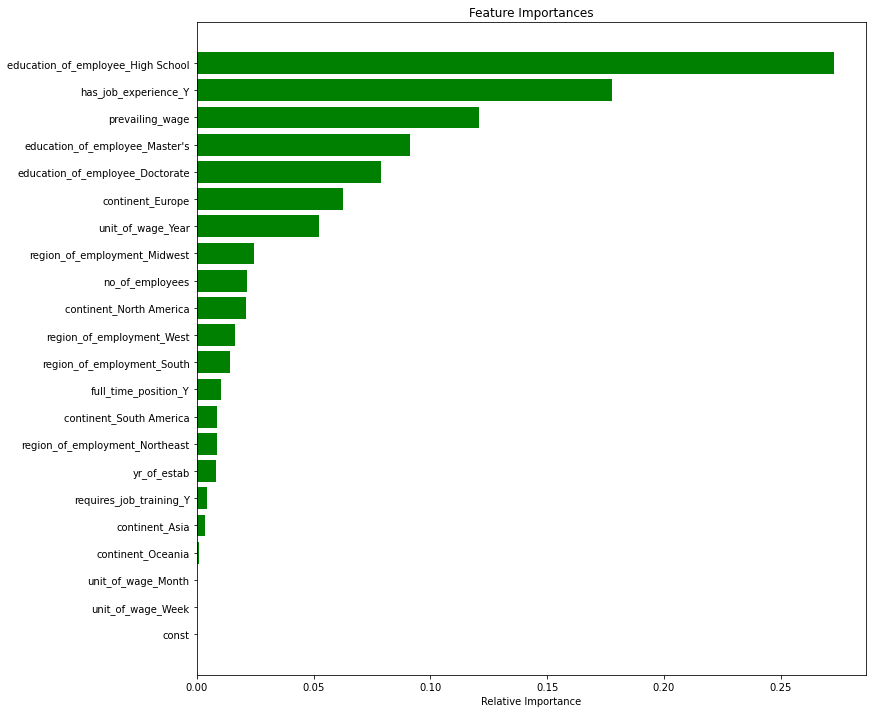

<IPython.core.display.Javascript object>

In [107]:
feature_names = X_train.columns
importances =  gbc_init.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Actionable Insights 

The factors that influence the certification or denial of a visa are: 
    *(listed in no particular order)* 
* Level of Education 
* Work Experience 
* Wage Type 
* Continent

Level of Education: Advanced degrees (Master's or Doctorate) get approved more than people with just a high school degree 
Work experience: Having existing work experience will help getting certified as opposed to not having any experience 
    * Note: The amount of work experience was not determined.  Future recommendation. 
Wage type: When it comes to certification, applicants who are paid by the year vastly out number the people who are paid by the hour. 
Continent: It is best to be from Europe except if the applicant just has a high school degree.  It is most disadvantageous to be from South America.  However, the other regions, with the exception of Europe, are not much better.  

Given this we can create an initial persona for a certified and denied applicant

<ins>Certified Persona</ins>
* Advanced Degree (Master's or Doctorate) 
* Works in the Northeast 
* No job training needed 
* Existing work experience 
* Wage type is yearly 

<ins>Denied Persona</ins>
* High School diploma 
* Limited to no work experience 
* Wage type is hourly

This is in line with actual historical information where skilled people with advanced degrees are able to immigrate easier than unskilled people.  There is more incentive for the receiving country to admit the skilled people who will help to build the receiving country.   

## Recommendations

I would implement this as a Robotic Process Automation (RPA) project divided into two phases: Design and Implementation.

The idea is to use the model to perform an initial assessment of the applications to determine if the application should be Classified or Denied.  The initial assessment would be reviewed by a person, a SME, to determine accuracy.  Information on false positives and false negatives would be fed back into the data analytics team for further strengthening of the model.  

Long term goal is to be able to perform a quick review of the classified recommendations as they are true positives and let the people work on the denied to ensure they are really true negatives.  

**Design** 
1. Applications would be accepted electronically 
2. Applications checked for completeness 
3. If incomplete, mark as incomplete and needing further review by a person
4. If complete, use the model to do an initial assessment to determine Classify or Denied status 
5. After initial assessment, move application into either Classify or Denied queue 
6. A person reviews the applications in the Classify to Denied queue to determine if initial assessment is correct 
    * If initial assessment correct, then either classify or Deny the application 
    * If initial assessment incorrect, note reasons for incorrect assessment 
7. Incorrect assessment information fed back to the data analytics team to further strength the model 


**Implementation** 
1. First application would check completeness of application
    * Incomplete applications would be marked as such and reviewed by a person 
2. Use a Gradient Boosting Classifier model to perform the initial assessment on the application 
    * Classify results would be moved to a classify queue for further review by a person 
    * Deny results would be moved to a classify queue for further review by a person 
3. Information would be collected by the people, the SMEs, on true and false positives and negatives and fed back to data analytics team 
4. Data analytics team can adjust the model and/or variables as needed based on the feedback from the SMEs
5. The initial set of metrics most important to the model are *(listed in no particular order)*: 
    * Advanced Degree (Master's or Doctorate)
    * No job training needed
    * Existing work experience
    * Wage type is yearly
    * Continent 

**Time frame** 
* Design: 1-2 months depending on current state of applications and data 
* Implementation 
    * 3-4 months months to implement application and perform initial tuning months depending on current state of applications and data
    * 3+ months of intensive model tuning with the SMEs months depending on current state of applications and data
    * After that, steady state with model performing at optimal levels with tuning and adjustment on a regular basis 
    

## Future Recommendations

1. Further classify the geographic data following the divisions used by the US Census Bureau which are: 
    * New England
    * Middle Atlantic 
    * East North Central
    * West North Central 
    * South Atlantic 
    * East South Central
    * West South Central
    * Mountain 
    * Pacific   
    * source: https://www.census.gov/programs-surveys/popest/about/glossary/geo-terms.html  
    * Having lived in five of the divisions and worked in all nine, there are differences in how people live and work in all nine divisions.  It would be worthwhile to break the geographic information down further. 
2. Have finer grain detail for the continent "Asia" to get a better understanding of the applicant's origin country
3. Add retention information on how long the worker stays in the position 
    * This will help determine if the time and effort to recruit the worker is worth it 
4. Add industry and/or economic sector data to further determine what skills are in high demand 
5. Add age information to determine when people immigrate
6. Add family information to determine if people immigrate alone or with their families 
7. Determine how many of the applicants are starting new with the company or doing an internal transfer 
    * Use Case: middle level executive in country gets assignment at Global HQ in the United States, gets more experience and exposure, and then goes back to original country to serve as country General Manager 
        * Use Case like this can be fast tracked as it is a temporary assignment with intentions of returning to original country 
8. Determine how much work experience is needed to positively tip in favour of getting certified


## Final Thought

I am very glad to have been able to do all these calculations using a laptop and Python. I cannot image what it would be doing all these calculations by hand except to say it would have taken a VERY, VERY long time.

Charles Babbage would be very proud!